<a href="https://colab.research.google.com/github/Jayantkhatter/RestaurantsRating/blob/main/RestaurantsRating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries and Mounting drive

In [ ]:
#load libraries
import pandas as pd #for data manipulation and analysis
import numpy as np #for working with arrays

#import data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
food = pd.read_csv("/content/drive/MyDrive/Assignment_2.csv")

#explore the dataset
print(food)

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping
print('Sample size:', food.shape[0])
print('Number of columns:', food.shape[1])


                                                     url  \
0      https://www.zomato.com/bangalore/d2v-cafe-1-ba...   
1      https://www.zomato.com/bangalore/the-burger-pl...   
2      https://www.zomato.com/bangalore/millet-mama-b...   
3      https://www.zomato.com/bangalore/red-onion-sha...   
4      https://www.zomato.com/bangalore/chaiywaala-da...   
...                                                  ...   
40125  https://www.zomato.com/bangalore/yumlane-brook...   
40126  https://www.zomato.com/bangalore/american-dess...   
40127  https://www.zomato.com/bangalore/new-arya-bhav...   
40128  https://www.zomato.com/bangalore/le-charcoal-x...   
40129  https://www.zomato.com/bangalore/kaati-zone-ch...   

                                                 address                 name  \
0      173/218, GF, Opposite Ranka Colony, Bannerghat...             D2V Cafe   
1      2nd Floor, MMR Plaza, Above DCB Bank, Sarjapur...     The Burger Place   
2      Next To Surana College, South

# Inspect data at a glance


In [ ]:
print(food.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   url                 40130 non-null  object 
 1   address             40130 non-null  object 
 2   name                40130 non-null  object 
 3   phone               39246 non-null  object 
 4   location            40130 non-null  object 
 5   rest_type           40130 non-null  object 
 6   cuisines            40112 non-null  object 
 7   menu_item           40130 non-null  object 
 8   listed_in_type      40130 non-null  object 
 9   listed_in_city      40130 non-null  object 
 10  online_order        40130 non-null  object 
 11  book_table          40130 non-null  object 
 12  ave_cost_for_two    39890 non-null  float64
 13  dish_liked          17351 non-null  object 
 14  votes               40130 non-null  int64  
 15  ave_review_ranking  33751 non-null  float64
 16  rate

In [ ]:
print (food.shape)

(40130, 17)


In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

print(food.head(10))

                                                 url                                            address                         name                             phone               location      rest_type                                           cuisines                                          menu_item listed_in_type         listed_in_city online_order book_table  ave_cost_for_two                                         dish_liked  votes  ave_review_ranking  rate
0  https://www.zomato.com/bangalore/d2v-cafe-1-ba...  173/218, GF, Opposite Ranka Colony, Bannerghat...                     D2V Cafe  +91 9886986111\r\n+91 8550051111      Bannerghatta Road           Cafe                                               Cafe                                                 []          Cafes               JP Nagar           No         No             700.0                                                NaN     13            4.750000   3.6
1  https://www.zomato.com/bangalore/the-burger-pl...  2nd 

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

print(food.tail(10))

                                                     url                                            address                name                                 phone               location           rest_type                              cuisines                                          menu_item listed_in_type    listed_in_city online_order book_table  ave_cost_for_two                                         dish_liked  votes  ave_review_ranking  rate
40120  https://www.zomato.com/bangalore/happy-eats-ko...  1st Floor, 1st Cross, Next To Bosch Back Gate,...          Happy Eats                        +91 8041202278  Koramangala 7th Block            Delivery             North Indian, Continental  ['Happy Paneer Burger', 'Happy Podi Idli', 'Ha...       Delivery         Jayanagar          Yes         No             300.0                                                NaN      0                 NaN   NaN
40121  https://www.zomato.com/bangalore/best-biryani-...  No 556, Hal Stage 3, Jeevan 

In [ ]:
# To check different types of rest types data
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

Data_type_Delivery=food.loc[food['rest_type'] == 'Takeaway, Delivery'].sample(10)
print (Data_type_Delivery)
print("No. of rows:",food.loc[food['rest_type'] == 'Takeaway, Delivery'].shape[0])
print("No. of column:",food.loc[food['rest_type'] == 'Takeaway, Delivery'].shape[1])

                                                     url                                            address                        name                             phone                       location           rest_type                                          cuisines                                          menu_item listed_in_type         listed_in_city online_order book_table  ave_cost_for_two dish_liked  votes  ave_review_ranking  rate
12115  https://www.zomato.com/bangalore/star-bowl-hsr...  521, 2nd Floor, Teachers Colony, Sarjapura Rin...                   Star Bowl                    +91 8042070493                            HSR  Takeaway, Delivery                      North Indian, Chinese, Rolls  ['Jeera Rice', 'Hyderbadi Chicken Dum Biryani'...       Delivery                    HSR          Yes         No             650.0        NaN      0                 NaN   NaN
8472   https://www.zomato.com/bangalore/indian-food-b...  9, Near Jayadeva Signal, Oppoite SBI ATM, 100 ... 

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent line wrapping

Data_type_cafe = food.loc[food['rest_type'] == 'Cafe'].sample(10)
print(Data_type_cafe)
print("No. of rows:", food.loc[food['rest_type'] == 'Cafe'].shape[0])
print("No. of columns:", food.loc[food['rest_type'] == 'Cafe'].shape[1])

                                                     url                                            address                                             name                           phone               location rest_type                                           cuisines                                          menu_item listed_in_type         listed_in_city online_order book_table  ave_cost_for_two                                         dish_liked  votes  ave_review_ranking  rate
29066  https://www.zomato.com/bangalore/om-made-cafe-...  136, Rooftop, Above Gold's Gym, 1st Cross, Kor...                                     Om Made Cafe    080 43024010\r\n080 25533369  Koramangala 5th Block      Cafe                Cafe, Continental, European, Juices                                                 []       Delivery                    BTM           No         No            1300.0  Margarita, Pasta, Mocktails, Lemonade, Brusche...   2729            3.523810   4.0
12294  https://www.zomat

# Inspect missing data
The data preprocessing is cyclic with analysing and visualising data, handling missing data, and feature engineering. For the learning purpose, we show you some simple techniques, you should move between the activities yourself.

In [ ]:
#learn to use for loop, and accessing elements of a dataframe using iloc
#Count missing data
for i in food.iloc[:,0:]:
  miss=food[i].isna().sum()
  print(i,'missing: ', miss)

url missing:  0
address missing:  0
name missing:  0
phone missing:  884
location missing:  0
rest_type missing:  0
cuisines missing:  18
menu_item missing:  0
listed_in_type missing:  0
listed_in_city missing:  0
online_order missing:  0
book_table missing:  0
ave_cost_for_two missing:  240
dish_liked missing:  22779
votes missing:  0
ave_review_ranking missing:  6379
rate missing:  8336


##Dropping and Filling the missing values

In [ ]:
##Dropped two entire column which we don't need
food.drop(['dish_liked','phone','url'], axis=1, inplace=True)
print(food.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             40130 non-null  object 
 1   name                40130 non-null  object 
 2   location            40130 non-null  object 
 3   rest_type           40130 non-null  object 
 4   cuisines            40112 non-null  object 
 5   menu_item           40130 non-null  object 
 6   listed_in_type      40130 non-null  object 
 7   listed_in_city      40130 non-null  object 
 8   online_order        40130 non-null  object 
 9   book_table          40130 non-null  object 
 10  ave_cost_for_two    39890 non-null  float64
 11  votes               40130 non-null  int64  
 12  ave_review_ranking  33751 non-null  float64
 13  rate                31794 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 4.3+ MB
None


In [ ]:
## Fill in missing numerical data with mean
food['ave_cost_for_two'].fillna(food['ave_cost_for_two'].mean(),inplace=True)
food['ave_review_ranking'].fillna(food['ave_review_ranking'].median(),inplace=True)
food['rate'].fillna(food['rate'].median(),inplace=True)

In [ ]:
## Fill in missing data with N/A
food['cuisines'].fillna("N/A", inplace=True)

In [ ]:
#learn to use for loop, and accessing elements of a dataframe using iloc
#Count missing data
for i in food.iloc[:,0:]:
  miss=food[i].isna().sum()
  print(i,'missing: ', miss)

address missing:  0
name missing:  0
location missing:  0
rest_type missing:  0
cuisines missing:  0
menu_item missing:  0
listed_in_type missing:  0
listed_in_city missing:  0
online_order missing:  0
book_table missing:  0
ave_cost_for_two missing:  0
votes missing:  0
ave_review_ranking missing:  0
rate missing:  0


# Converting data into Numeric

In [ ]:
#Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
# convert categorical variables to numerical using LabelEncoder
encoder = LabelEncoder()
food['online_order'] = encoder.fit_transform(food['online_order'])
food['book_table'] = encoder.fit_transform(food['book_table'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
food['location'] = label_encoder.fit_transform(food['location'])
food['rest_type'] = label_encoder.fit_transform(food['rest_type'])
food['listed_in_type'] = label_encoder.fit_transform(food['listed_in_type'])
food['listed_in_city'] = label_encoder.fit_transform(food['listed_in_city'])

In [ ]:
print (food.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   address             40130 non-null  object 
 1   name                40130 non-null  object 
 2   location            40130 non-null  int64  
 3   rest_type           40130 non-null  int64  
 4   cuisines            40130 non-null  object 
 5   menu_item           40130 non-null  object 
 6   listed_in_type      40130 non-null  int64  
 7   listed_in_city      40130 non-null  int64  
 8   online_order        40130 non-null  int64  
 9   book_table          40130 non-null  int64  
 10  ave_cost_for_two    40130 non-null  float64
 11  votes               40130 non-null  int64  
 12  ave_review_ranking  40130 non-null  float64
 13  rate                40130 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 4.3+ MB
None


# Conduct Exploratory Data Analysis - EDA
Stats and visualtion

  1.Univariate analysis

  2.Bivariate analysis
  
  3.Multivariate analysis

##Univariate Analysis

Univariate analysis explores centrality, summarise and visualises data distribution for each variable at a time

### Statistical Description of data

In [ ]:
#descriptive stats for numerical variables
food.describe()

,location,rest_type,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate
count,40130.000000,40130.000000,40130.000000,40130.000000,40130.000000,40130.000000,40130.000000,40130.000000,40130.000000,40130.000000
mean,35.374009,3.641964,2.749439,14.070994,0.611986,0.102018,506.697293,225.685547,3.610388,3.666150
std,27.336681,1.703521,1.094749,8.244336,0.487304,0.302676,323.193552,598.568781,0.839315,0.384137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,1.000000,1.800000
25%,9.000000,2.000000,2.000000,7.000000,0.000000,0.000000,300.000000,6.000000,3.200000,3.500000
50%,32.000000,5.000000,2.000000,15.000000,1.000000,0.000000,400.000000,36.000000,3.727273,3.700000
75%,55.000000,5.000000,4.000000,20.000000,1.000000,0.000000,600.000000,174.000000,4.000000,3.900000
max,92.000000,6.000000,6.000000,29.000000,1.000000,1.000000,2500.000000,12121.000000,5.000000,4.900000


In [ ]:
#descriptive stats for numerical variable Which is rate
food.rate.describe()

count    40130.000000
mean         3.666150
std          0.384137
min          1.800000
25%          3.500000
50%          3.700000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#summarise categorical columns as well
data_types =['object', 'float', 'int']
food.describe(include=data_types)

,address,name,location,rest_type,cuisines,menu_item,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate
count,40130,40130,40130.000,40130.000,40130,40130,40130.000,40130.000,40130.000,40130.000,40130.000,40130.000,40130.000,40130.000
unique,9319,7321,NaN,NaN,2214,7324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Delivery Only,Cafe Coffee Day,NaN,NaN,North Indian,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,124,96,NaN,NaN,2723,30620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,35.374,3.642,NaN,NaN,2.749,14.071,0.612,0.102,506.697,225.686,3.610,3.666
std,NaN,NaN,27.337,1.704,NaN,NaN,1.095,8.244,0.487,0.303,323.194,598.569,0.839,0.384
min,NaN,NaN,0.000,0.000,NaN,NaN,0.000,0.000,0.000,0.000,40.000,0.000,1.000,1.800
25%,NaN,NaN,9.000,2.000,NaN,NaN,2.000,7.000,0.000,0.000,300.000,6.000,3.200,3.500
50%,NaN,NaN,32.000,5.000,NaN,NaN,2.000,15.000,1.000,0.000,400.000,36.000,3.727,3.700
75%,NaN,NaN,55.000,5.000,NaN,NaN,4.000,20.000,1.000,0.000,600.000,174.000,4.000,3.900


### Explore each numerical variable

In [ ]:
#explore each numerical variable
print('ave_review_ranking mean: ', (food['ave_review_ranking'].mean()))
print('ave_review_ranking meadian: ', (food['ave_review_ranking'].median()))
print('ave_review_ranking min: ', (food['ave_review_ranking'].min()))
print('ave_review_ranking max: ', (food['ave_review_ranking'].max()))
print('ave_review_ranking std: ', (food['ave_review_ranking'].std()))

ave_review_ranking mean:  3.6103884188004485
ave_review_ranking meadian:  3.727272727
ave_review_ranking min:  1.0
ave_review_ranking max:  5.0
ave_review_ranking std:  0.8393153882234086


<Axes: >

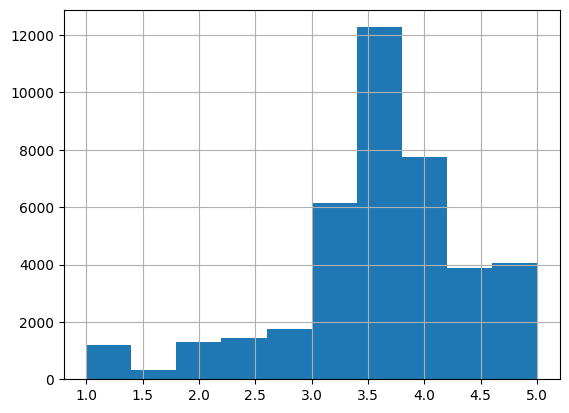

In [ ]:
#Visualise a numerical variable using histrograms using matplot
food.ave_review_ranking.hist()

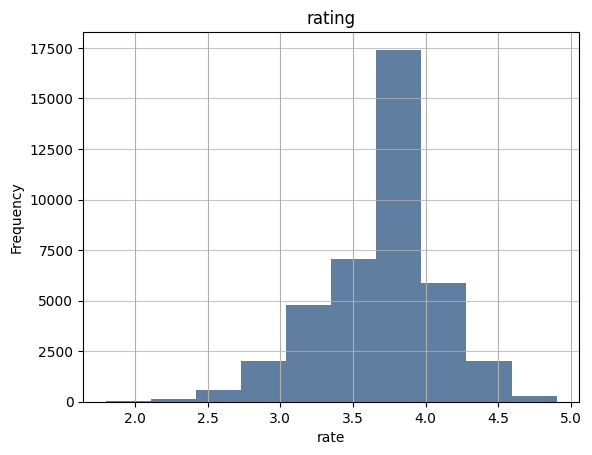

In [ ]:
food['rate'].plot.hist(grid=True, bins=10, rwidth=2, color='#607e9f')
plt.title('rating')
plt.xlabel('rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)


<Axes: xlabel='rate', ylabel='Count'>

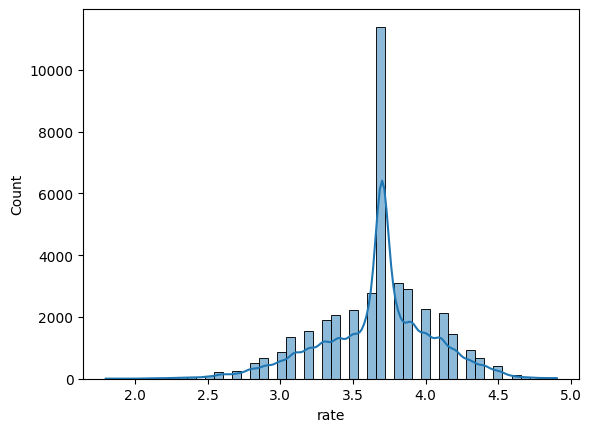

In [ ]:
#using seaborn https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(data=food, x='rate', bins=50, kde=True)

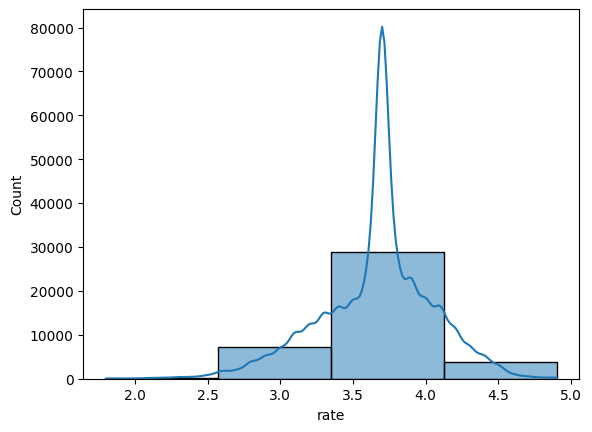

In [ ]:
import seaborn as sns


# Calculate the number of bins
num_bins = int(max(food['rate']) - min(food['rate']) + 1)

# Create the histogram with each bin representing 1 age
sns.histplot(data=food, x='rate', bins=num_bins, kde=True)

# Display the plot
plt.show()

<Axes: xlabel='rate'>

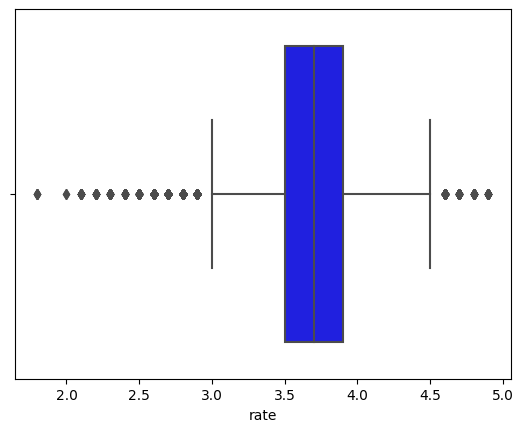

In [ ]:
sns.boxplot(x=food['rate'], color='blue')

<Axes: xlabel='rate'>

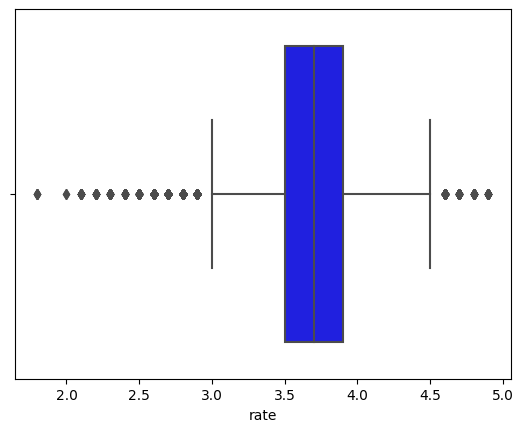

In [ ]:
sns.boxplot(x=food['rate'], color='blue')

Explore each categorical variable

In [ ]:
#describe categorical variables
print(food['book_table'].describe())
print(food['online_order'].describe())

count   40130.000
mean        0.102
std         0.303
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         1.000
Name: book_table, dtype: float64
count   40130.000
mean        0.612
std         0.487
min         0.000
25%         0.000
50%         1.000
75%         1.000
max         1.000
Name: online_order, dtype: float64


Visualise each categorical variable

<Axes: xlabel='book_table', ylabel='count'>

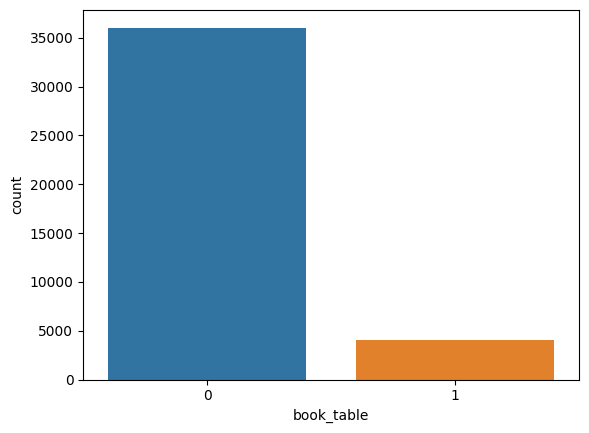

In [ ]:
#Using seaborn
sns.countplot(x=food['book_table'])

<Axes: xlabel='online_order', ylabel='count'>

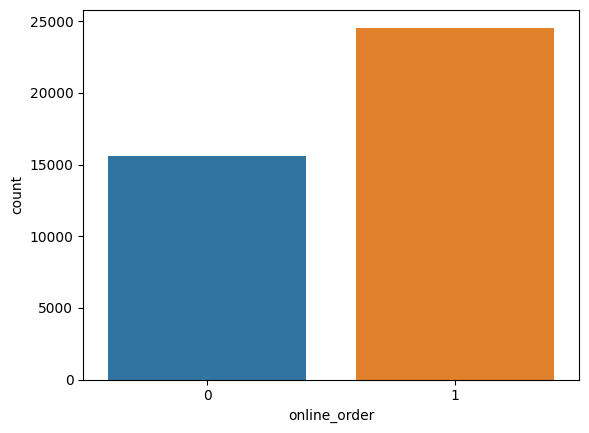

In [ ]:
#Using seaborn
sns.countplot(x=food['online_order'])

(array([36036.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4094.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

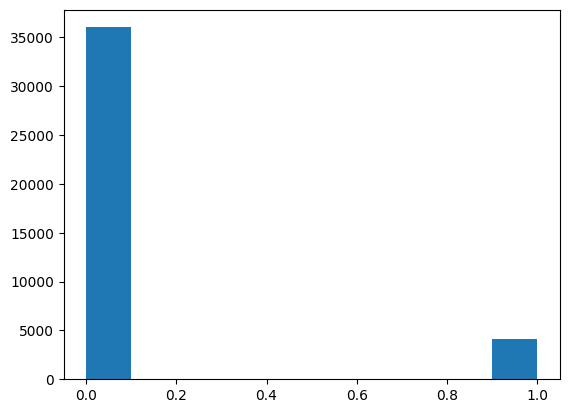

In [ ]:
plt.hist(food['book_table'])

### Question 1: How many restaurants offer table booking, and what impact does it have on ratings (rate)?

In [ ]:
# Count the number of rows where 'book_table' is 'Yes'
restaurants_with_table_booking = food.loc[food['book_table'] == 'Yes'].shape[0]

# Print the count
print("No. of rows with table booking:", restaurants_with_table_booking)

No. of rows with table booking: 0


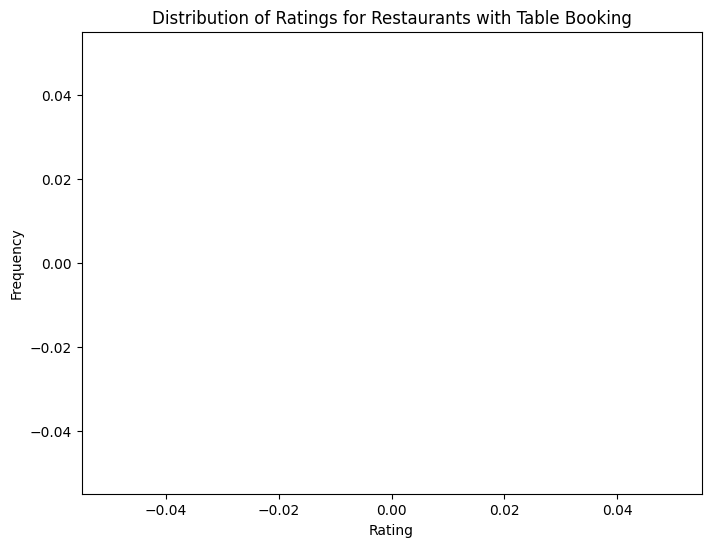

count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: rate, dtype: float64


In [ ]:
# Filter the dataset to include only restaurants with table booking
restaurants_with_table_booking = food[food['book_table'] == 'Yes']

# Calculate statistics for ratings of restaurants with table booking
statistics_with_table_booking = restaurants_with_table_booking['rate'].describe()

# Create a histogram for ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=restaurants_with_table_booking, x='rate', bins=20, kde=True)
plt.title('Distribution of Ratings for Restaurants with Table Booking')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Display the statistics
print(statistics_with_table_booking)

Impact of it on rating is: We calculated it by comparing actual rate column description with new rate description column which has only table booking values

In [ ]:
ratings_all=(food.rate.describe())
rating_with_table_booking=(statistics_with_table_booking)
comparison_df = pd.DataFrame({
    'All Restaurants': ratings_all,
    'Restaurants with Table Booking':rating_with_table_booking
})
print(comparison_df)

       All Restaurants  Restaurants with Table Booking
count        40130.000                           0.000
mean             3.666                             NaN
std              0.384                             NaN
min              1.800                             NaN
25%              3.500                             NaN
50%              3.700                             NaN
75%              3.900                             NaN
max              4.900                             NaN


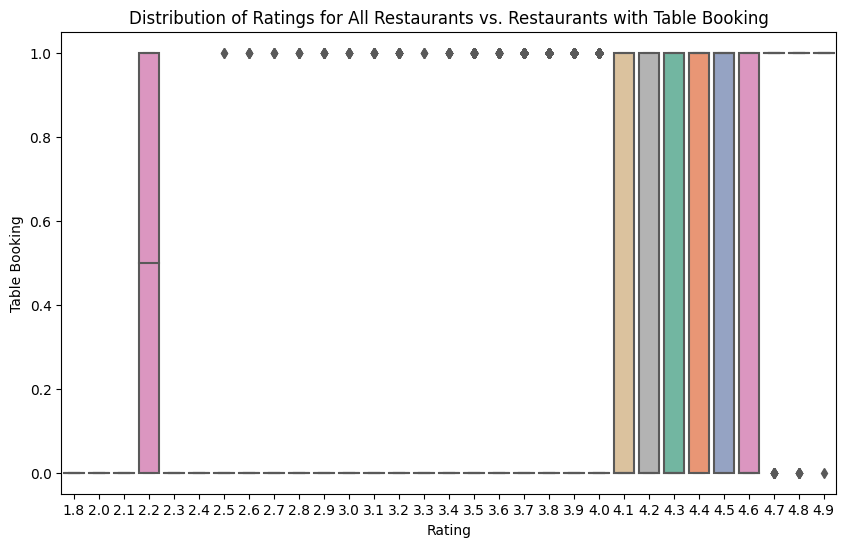

In [ ]:
# Filter the dataset to include only restaurants with table booking
restaurants_with_table_booking = food[food['book_table'] == 'Yes']

# Create a box plot to visually compare the distribution of ratings
plt.figure(figsize=(10, 6))
sns.boxplot(data=food, x='rate', y='book_table', palette='Set2')
plt.title('Distribution of Ratings for All Restaurants vs. Restaurants with Table Booking')
plt.xlabel('Rating')
plt.ylabel('Table Booking')
plt.show()


book_table :

0    36036
1     4094
Name: book_table, dtype: int64 



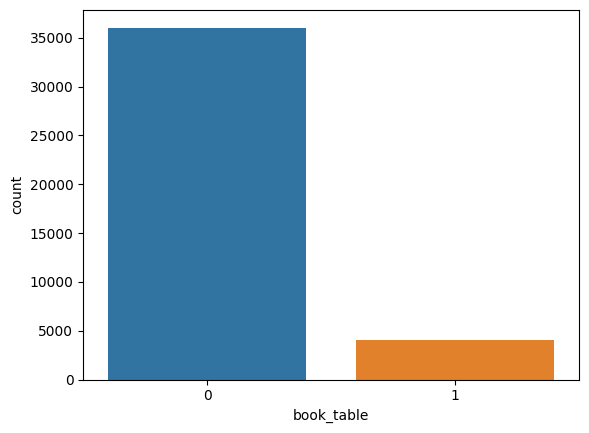

online_order :

1    24559
0    15571
Name: online_order, dtype: int64 



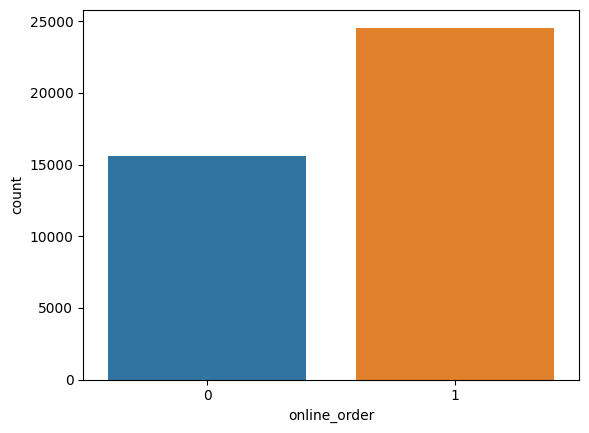

In [ ]:
cat_data=['book_table','online_order']
for i in cat_data:
   print(i, ':\n')
   print(food[i].value_counts(),'\n')
   sns.countplot(data=food, x=i, palette='tab10')
   plt.show()

### Question 2: How many restaurants offer online ordering, and what impact does it have on ratings (rate)?

In [ ]:
# Count the number of rows where 'online_order' is 'Yes'
restaurants_with_online_order = food.loc[food['online_order'] == 'Yes'].shape[0]

# Print the count
print("No. of rows with online_order:", restaurants_with_online_order)

No. of rows with online_order: 0


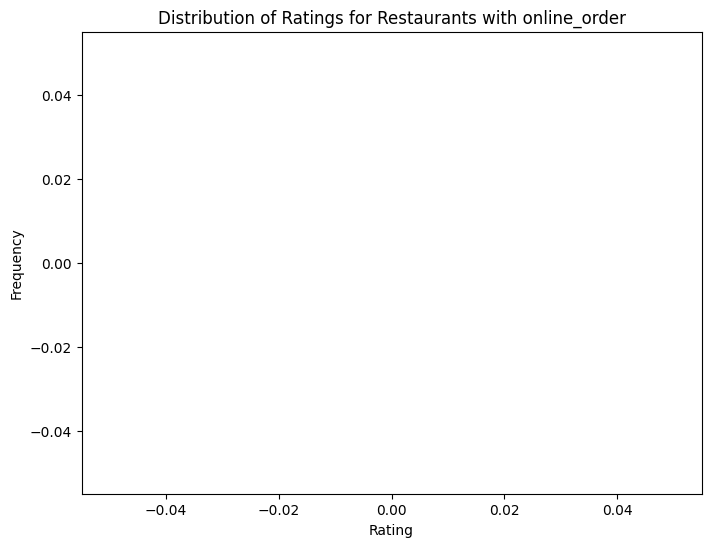

count   0.000
mean      NaN
std       NaN
min       NaN
25%       NaN
50%       NaN
75%       NaN
max       NaN
Name: rate, dtype: float64


In [ ]:
# Filter the dataset to include only restaurants with online order
restaurants_with_online_order = food[food['online_order'] == 'Yes']

# Calculate statistics for ratings of restaurants with online order
statistics_with_online_order = restaurants_with_online_order['rate'].describe()

# Create a histogram for ratings
plt.figure(figsize=(8, 6))
sns.histplot(data=restaurants_with_online_order, x='rate', bins=20, kde=True)
plt.title('Distribution of Ratings for Restaurants with online_order')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Display the statistics
print(statistics_with_online_order)

In [ ]:
ratings_all=(food.rate.describe())
rating_with_online_order=(statistics_with_online_order)
comparison_df = pd.DataFrame({
    'All Restaurants':ratings_all,
    'Restaurants with online order':rating_with_online_order
})
print(comparison_df)

       All Restaurants  Restaurants with online order
count        40130.000                          0.000
mean             3.666                            NaN
std              0.384                            NaN
min              1.800                            NaN
25%              3.500                            NaN
50%              3.700                            NaN
75%              3.900                            NaN
max              4.900                            NaN


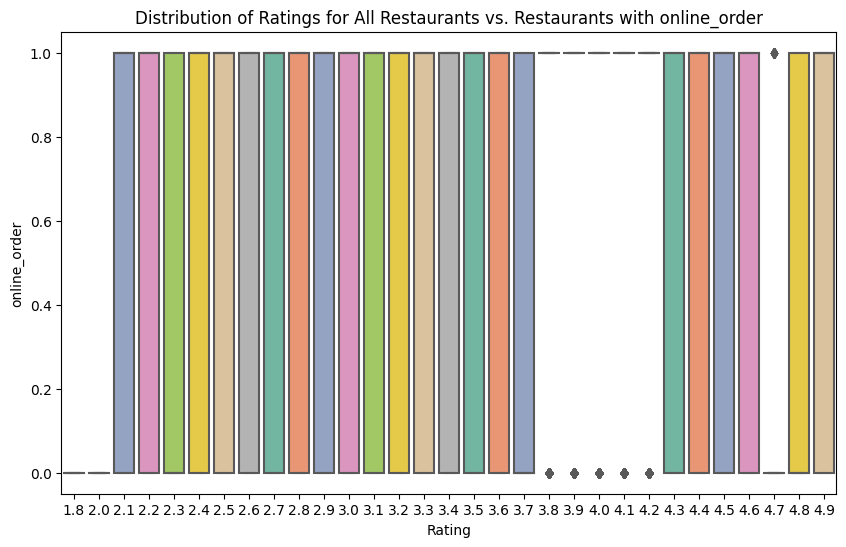

In [ ]:
# Filter the dataset to include only restaurants with table booking
restaurants_with_online_order = food[food['online_order'] == 'Yes']

# Create a box plot to visually compare the distribution of ratings
plt.figure(figsize=(10, 6))
sns.boxplot(data=food, x='rate', y='online_order', palette='Set2')
plt.title('Distribution of Ratings for All Restaurants vs. Restaurants with online_order')
plt.xlabel('Rating')
plt.ylabel('online_order')
plt.show()

### Question 3: What is the effect of the average cost for two (in INR) and average customer review ranking
(ave_review_ranking in the dataset) on overall ratings (rate)?


In [ ]:
# Calculate descriptive statistics for numerical variables 'rate', 'average_cost_for_two', and 'ave_review_ranking'
numerical_stats = food[['rate', 'ave_cost_for_two', 'ave_review_ranking']].describe()

# Print the descriptive statistics
print(numerical_stats)


           rate  ave_cost_for_two  ave_review_ranking
count 40130.000         40130.000           40130.000
mean      3.666           506.697               3.610
std       0.384           323.194               0.839
min       1.800            40.000               1.000
25%       3.500           300.000               3.200
50%       3.700           400.000               3.727
75%       3.900           600.000               4.000
max       4.900          2500.000               5.000


In [ ]:
# Calculate the correlation between 'average_cost_for_two' and 'rate'
correlation_cost_rating=food['ave_cost_for_two'].corr(food['rate'])

# Calculate the correlation between 'ave_review_ranking' and 'rate'
correlation_ranking_rating=food['ave_review_ranking'].corr(food['rate'])


In [ ]:
print (correlation_cost_rating)

0.3506577997470761


In [ ]:
print (correlation_ranking_rating)

0.4199779909522902


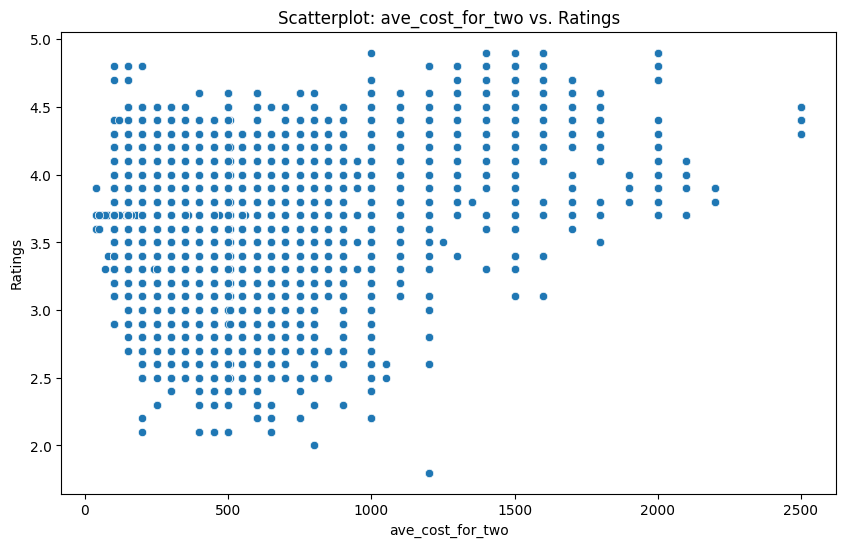

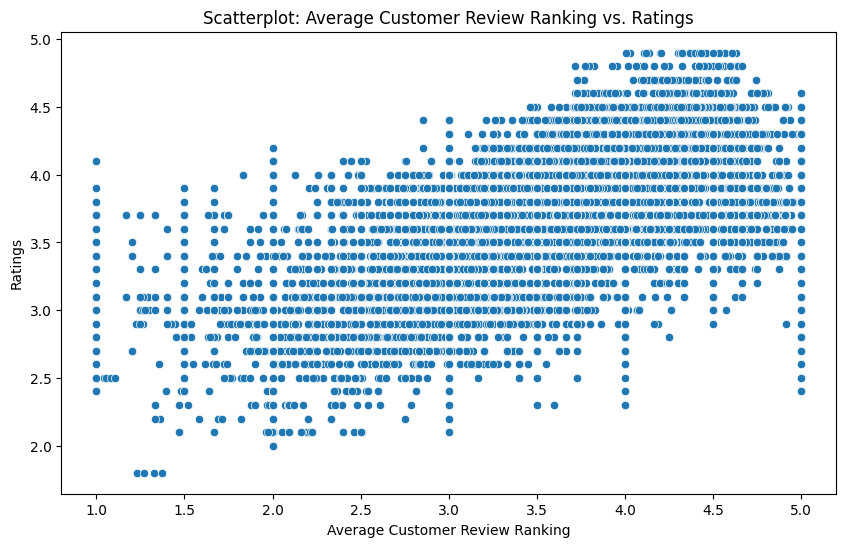

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatterplot for 'average_cost_for_two' vs. 'rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=food, x='ave_cost_for_two', y='rate')
plt.title('Scatterplot: ave_cost_for_two vs. Ratings')
plt.xlabel('ave_cost_for_two')
plt.ylabel('Ratings')
plt.show()

# Create scatterplot for 'ave_review_ranking' vs. 'rate'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=food, x='ave_review_ranking', y='rate')
plt.title('Scatterplot: Average Customer Review Ranking vs. Ratings')
plt.xlabel('Average Customer Review Ranking')
plt.ylabel('Ratings')
plt.show()

###Question 4: How do ratings (rate) and average cost for two vary among the restaurant types?

In [ ]:
# Calculate descriptive statistics for numerical variables 'rate', 'average_cost_for_two', and 'ave_review_ranking'
stats = food[['rate', 'ave_cost_for_two', 'rest_type']].info()

# Print the descriptive statistics
print(stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rate              40130 non-null  float64
 1   ave_cost_for_two  40130 non-null  float64
 2   rest_type         40130 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 940.7 KB
None


In [ ]:
# Group the data by 'restaurant_type' and calculate various statistics within each group
grouped_data = food.groupby('rest_type')[['rate', 'ave_cost_for_two']].agg(['mean','median','std']).reset_index()
print (grouped_data)

  rest_type  rate              ave_cost_for_two                 
             mean median   std             mean   median     std
0         0 3.643  3.700 0.253          370.316  400.000 127.048
1         1 3.834  3.900 0.408          618.770  600.000 240.783
2         2 3.738  3.800 0.452          789.271  700.000 332.208
3         3 4.065  4.100 0.432         1238.883 1200.000 384.590
4         4 3.616  3.700 0.340          433.515  450.000 145.419
5         5 3.588  3.700 0.317          318.285  300.000 124.751
6         6 3.582  3.700 0.309          393.150  400.000 175.518


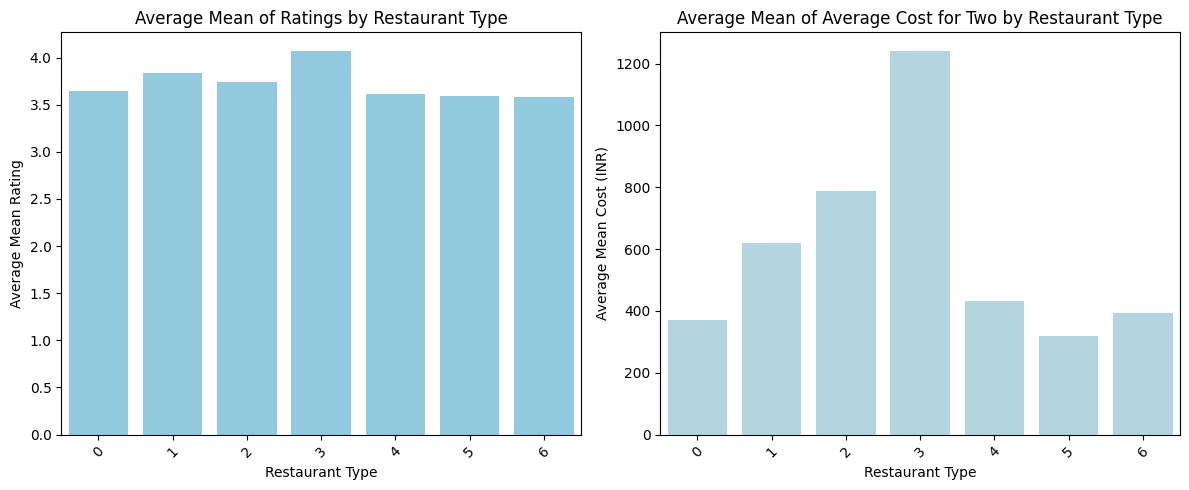

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for the two bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Create a bar chart for the average mean of ratings by restaurant type
sns.barplot(data=grouped_data, x='rest_type', y=('rate', 'mean'), color='skyblue', ax=axes[0])
axes[0].set_title('Average Mean of Ratings by Restaurant Type')
axes[0].set_xlabel('Restaurant Type')
axes[0].set_ylabel('Average Mean Rating')
axes[0].tick_params(axis='x', rotation=45)

# Create a bar chart for the average mean of average cost for two by restaurant type
sns.barplot(data=grouped_data, x='rest_type', y=('ave_cost_for_two', 'mean'), color='lightblue', ax=axes[1])
axes[1].set_title('Average Mean of Average Cost for Two by Restaurant Type')
axes[1].set_xlabel('Restaurant Type')
axes[1].set_ylabel('Average Mean Cost (INR)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust the layout for better presentation
plt.tight_layout()


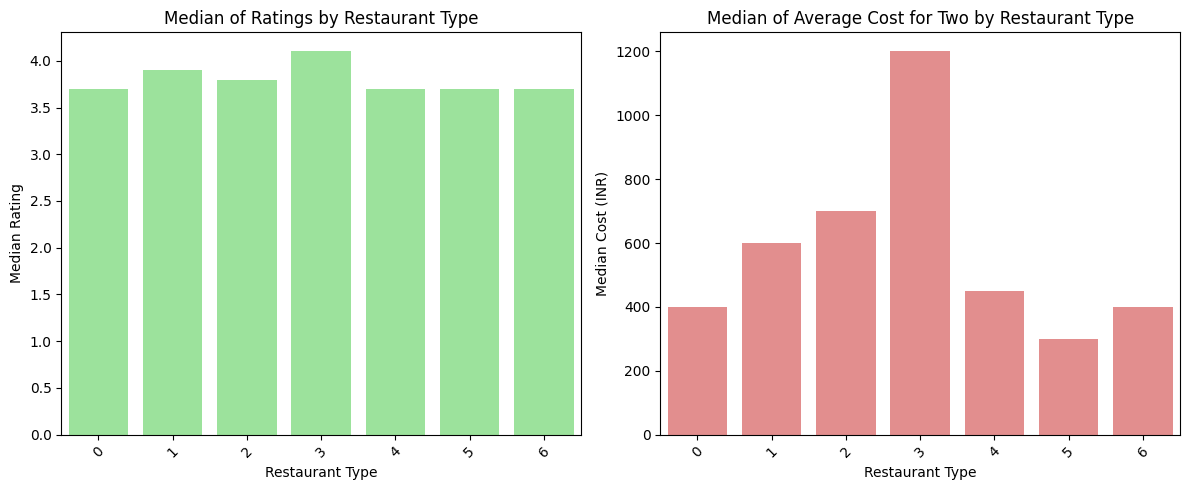

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for the two bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Create a bar chart for the median of ratings by restaurant type (Left Chart)
sns.barplot(data=grouped_data, x='rest_type', y=('rate', 'median'), color='lightgreen', ax=axes[0])
axes[0].set_title('Median of Ratings by Restaurant Type')
axes[0].set_xlabel('Restaurant Type')
axes[0].set_ylabel('Median Rating')
axes[0].tick_params(axis='x', rotation=45)

# Create a bar chart for the median of average cost for two by restaurant type (Right Chart)
sns.barplot(data=grouped_data, x='rest_type', y=('ave_cost_for_two', 'median'), color='lightcoral', ax=axes[1])
axes[1].set_title('Median of Average Cost for Two by Restaurant Type')
axes[1].set_xlabel('Restaurant Type')
axes[1].set_ylabel('Median Cost (INR)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust the layout for better presentation
plt.tight_layout()
plt.show()

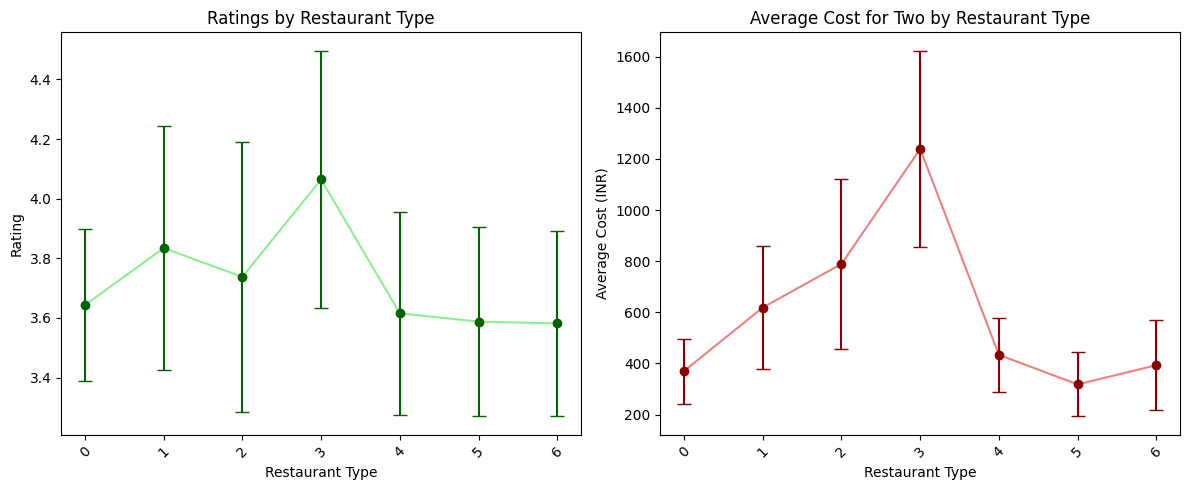

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for the two line charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Calculate the mean and standard deviation of ratings by restaurant type
mean_ratings = grouped_data[('rate', 'mean')]
std_ratings = grouped_data[('rate', 'std')]

# Calculate the mean and standard deviation of average cost for two by restaurant type
mean_cost_for_two = grouped_data[('ave_cost_for_two', 'mean')]
std_cost_for_two = grouped_data[('ave_cost_for_two', 'std')]

# Create a line plot for ratings with error bars for standard deviation (Left Chart)
sns.lineplot(data=grouped_data, x='rest_type', y=('rate', 'mean'), color='lightgreen', marker='o', ax=axes[0])
axes[0].errorbar(x=grouped_data['rest_type'], y=mean_ratings, yerr=std_ratings, fmt='o', color='darkgreen', capsize=5)
axes[0].set_title('Ratings by Restaurant Type')
axes[0].set_xlabel('Restaurant Type')
axes[0].set_ylabel('Rating')
axes[0].tick_params(axis='x', rotation=45)

# Create a line plot for average cost for two with error bars for standard deviation (Right Chart)
sns.lineplot(data=grouped_data, x='rest_type', y=('ave_cost_for_two', 'mean'), color='lightcoral', marker='o', ax=axes[1])
axes[1].errorbar(x=grouped_data['rest_type'], y=mean_cost_for_two, yerr=std_cost_for_two, fmt='o', color='darkred', capsize=5)
axes[1].set_title('Average Cost for Two by Restaurant Type')
axes[1].set_xlabel('Restaurant Type')
axes[1].set_ylabel('Average Cost (INR)')
axes[1].tick_params(axis='x', rotation=45)

# Adjust the layout for better presentation
plt.tight_layout()
plt.show()


Correlation matrix Graph

                            ave_cost_for_two   rate
rest_type                                          
0         ave_cost_for_two             1.000  0.098
          rate                         0.098  1.000
1         ave_cost_for_two             1.000  0.252
          rate                         0.252  1.000
2         ave_cost_for_two             1.000  0.418
          rate                         0.418  1.000
3         ave_cost_for_two             1.000  0.380
          rate                         0.380  1.000
4         ave_cost_for_two             1.000  0.036
          rate                         0.036  1.000
5         ave_cost_for_two             1.000 -0.004
          rate                        -0.004  1.000
6         ave_cost_for_two             1.000 -0.025
          rate                        -0.025  1.000


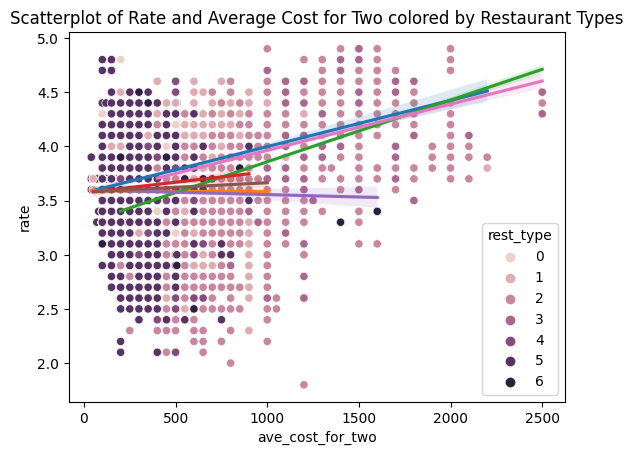

In [ ]:
correlation_matrix = food.groupby('rest_type')[['ave_cost_for_two', 'rate']].corr()
print(correlation_matrix)
sns.scatterplot(data=food, x='ave_cost_for_two', y='rate', hue='rest_type')

for category in food['rest_type'].unique():
  subset = food[food['rest_type'] == category]
  sns.regplot(data=subset, x='ave_cost_for_two', y='rate', scatter=False, label=category, line_kws={'color': sns.color_palette()[list(food['rest_type'].unique()).index(category)]})
plt.title('Scatterplot of Rate and Average Cost for Two colored by Restaurant Types')
plt.show()

### Question 5: Any additional insights about the restaurants, cities, and cuisines; for example, but not necessarily,what are the best- or worst- performing restaurants, or which city has the greatest number of restaurants?

In [ ]:
# Sort restaurants by rating in ascending order (best-performing) and display only names
best_performing_restaurants = food[['name', 'rate']].sort_values(by='rate', ascending=False).head(30)
print (best_performing_restaurants)

                                                    name  rate
32224                     Asia Kitchen By Mainland China 4.900
13454                     Asia Kitchen By Mainland China 4.900
13649                                       Punjab Grill 4.900
31886                                       Punjab Grill 4.900
21333                                           Flechazo 4.900
7816                           AB's - Absolute Barbecues 4.900
15961                     Asia Kitchen By Mainland China 4.900
7655                      Asia Kitchen By Mainland China 4.900
3031                      Asia Kitchen By Mainland China 4.900
30192                                           Flechazo 4.900
10791                          AB's - Absolute Barbecues 4.900
10939                                       Punjab Grill 4.900
32804                                       Punjab Grill 4.900
28070                                       Punjab Grill 4.900
6516                      Asia Kitchen By Mainland Chin

In [ ]:
# Sort restaurants by rating in descending order (worst-performing) and display only names
worst_performing_restaurants = food[['name', 'rate']].sort_values(by='rate', ascending=True).head(30)
print (worst_performing_restaurants)

                                   name  rate
5897   Alibi - Maya International Hotel 1.800
2342   Alibi - Maya International Hotel 1.800
36253  Alibi - Maya International Hotel 1.800
19663  Alibi - Maya International Hotel 1.800
15601  Alibi - Maya International Hotel 1.800
4890                            Bhagini 2.000
34136                           Bhagini 2.000
18095                    Ammi's Biryani 2.100
4557                     Ammi's Biryani 2.100
13114                    Ammi's Biryani 2.100
25391                     Decker's Lane 2.100
22460                     Mast Kalandar 2.100
22593    Midnight Hunger Solutions 24/7 2.100
6650     Midnight Hunger Solutions 24/7 2.100
23183                     Decker's Lane 2.100
16968                     Decker's Lane 2.100
560      Midnight Hunger Solutions 24/7 2.100
29891    Midnight Hunger Solutions 24/7 2.100
9183     Midnight Hunger Solutions 24/7 2.100
36548    Midnight Hunger Solutions 24/7 2.100
12227                     Mast Kal

In [ ]:
from __future__ import print_function
# Count the number of restaurants in each city
city_counts = food['location'].value_counts()
print (city_counts)

0     4422
22    2100
29    1769
45    1721
89    1590
      ... 
88       3
75       3
11       3
68       2
64       1
Name: location, Length: 93, dtype: int64


In [ ]:
# Find the location with the highest number of restaurants
city_with_most_restaurants = city_counts.idxmax()
print (city_with_most_restaurants)

0


In [ ]:
# Find the location with the lowest number of restaurants
city_with_least_restaurants = city_counts.idxmin()
print (city_with_least_restaurants)

64


# Bivariate Analysis


##Display a countplot for one categorical variable grouped by a second categorical variable

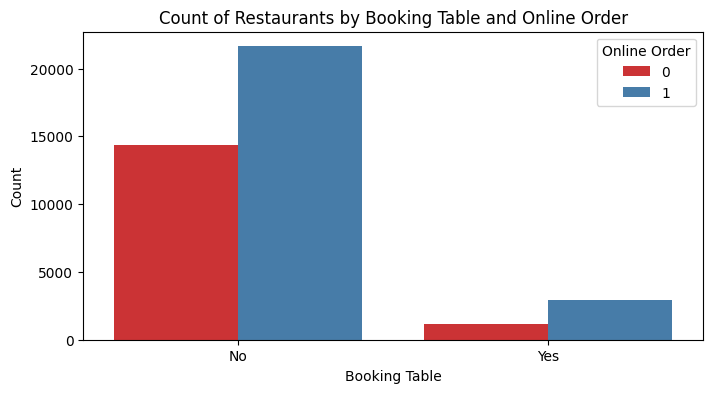

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(8, 4))

# Create a countplot for restaurant types based on booking tables and online orders
sns.countplot(data=food, x='book_table', hue='online_order', palette='Set1')

# Set labels and title
plt.title('Count of Restaurants by Booking Table and Online Order')
plt.xlabel('Booking Table')
plt.ylabel('Count')

# Rename x-axis labels for better interpretation
plt.xticks([0, 1], ['No', 'Yes'])

# Add a legend for online orders
plt.legend(title='Online Order', loc='upper right')

# Show the plot
plt.show()


##Compare distributions of numerical variables using boxplots

<Axes: xlabel='listed_in_type', ylabel='book_table'>

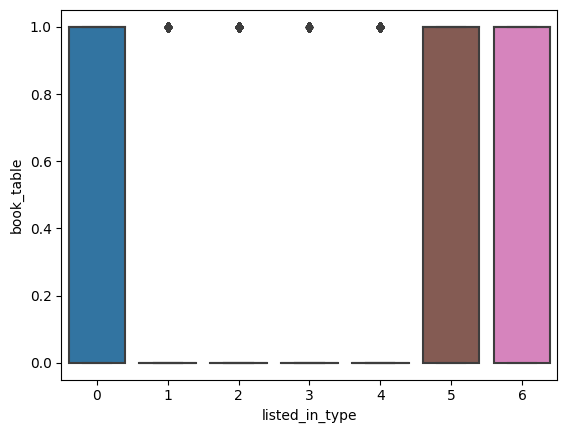

In [ ]:
sns.boxplot(data=food, x='listed_in_type', y='book_table')

<Axes: xlabel='rest_type', ylabel='online_order'>

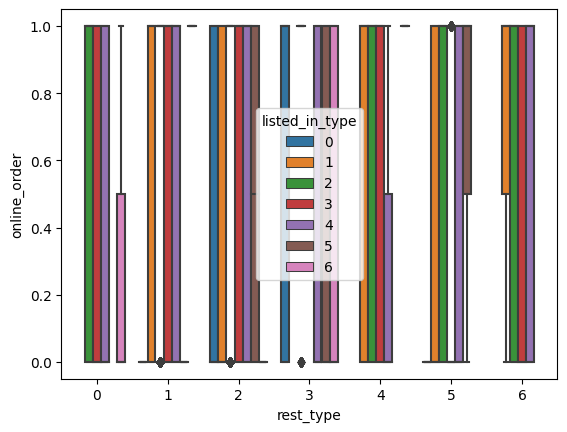

In [ ]:
sns.boxplot(data=food, x="rest_type", y="online_order", hue="listed_in_type")

<Axes: xlabel='rate', ylabel='Density'>

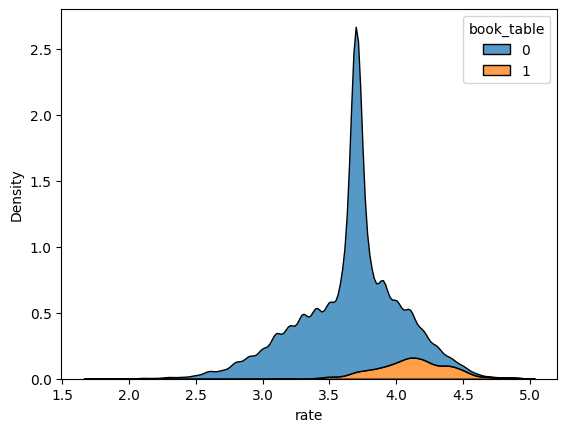

In [ ]:
#view Intersection distributions by rate
sns.kdeplot(data=food, x="rate", hue="book_table", multiple="stack")

##Ploting diagram to see relationships between two numerical variables

<Axes: xlabel='ave_cost_for_two', ylabel='rate'>

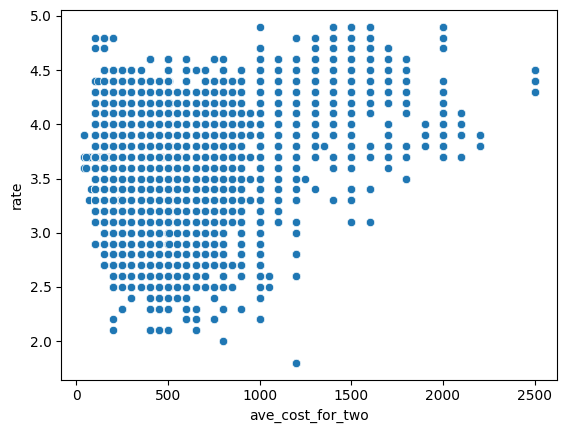

In [ ]:
sns.scatterplot(data=food, x='ave_cost_for_two', y='rate')

In [ ]:
##Dropped two entire column which we don't need
food.drop(['address','menu_item'], axis=1, inplace=True)
print(food.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40130 entries, 0 to 40129
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                40130 non-null  object 
 1   location            40130 non-null  int64  
 2   rest_type           40130 non-null  int64  
 3   cuisines            40130 non-null  object 
 4   listed_in_type      40130 non-null  int64  
 5   listed_in_city      40130 non-null  int64  
 6   online_order        40130 non-null  int64  
 7   book_table          40130 non-null  int64  
 8   ave_cost_for_two    40130 non-null  float64
 9   votes               40130 non-null  int64  
 10  ave_review_ranking  40130 non-null  float64
 11  rate                40130 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 3.7+ MB
None


# Multivariate Analysis


##Heatmap to show numerical data

<ipython-input-64-5ea7d2f5efc7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=food.corr(), annot=True, cmap='crest')


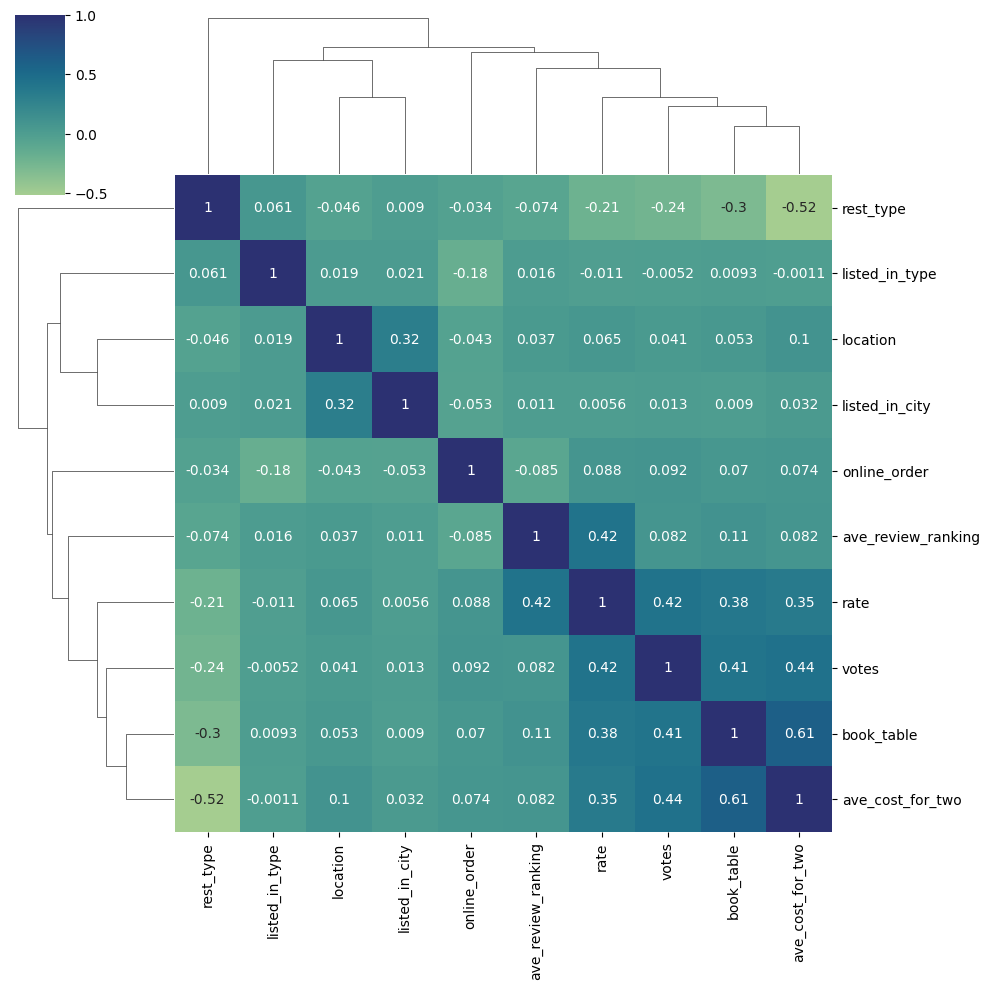

In [ ]:
#heatmap for data=food.corr(), cmap="Blues" or cmap='crest'
sns.clustermap(data=food.corr(), annot=True, cmap='crest')

<ipython-input-65-5d15c6a484e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=food.corr(), cmap="Blues",linewidths=.9, annot=True)


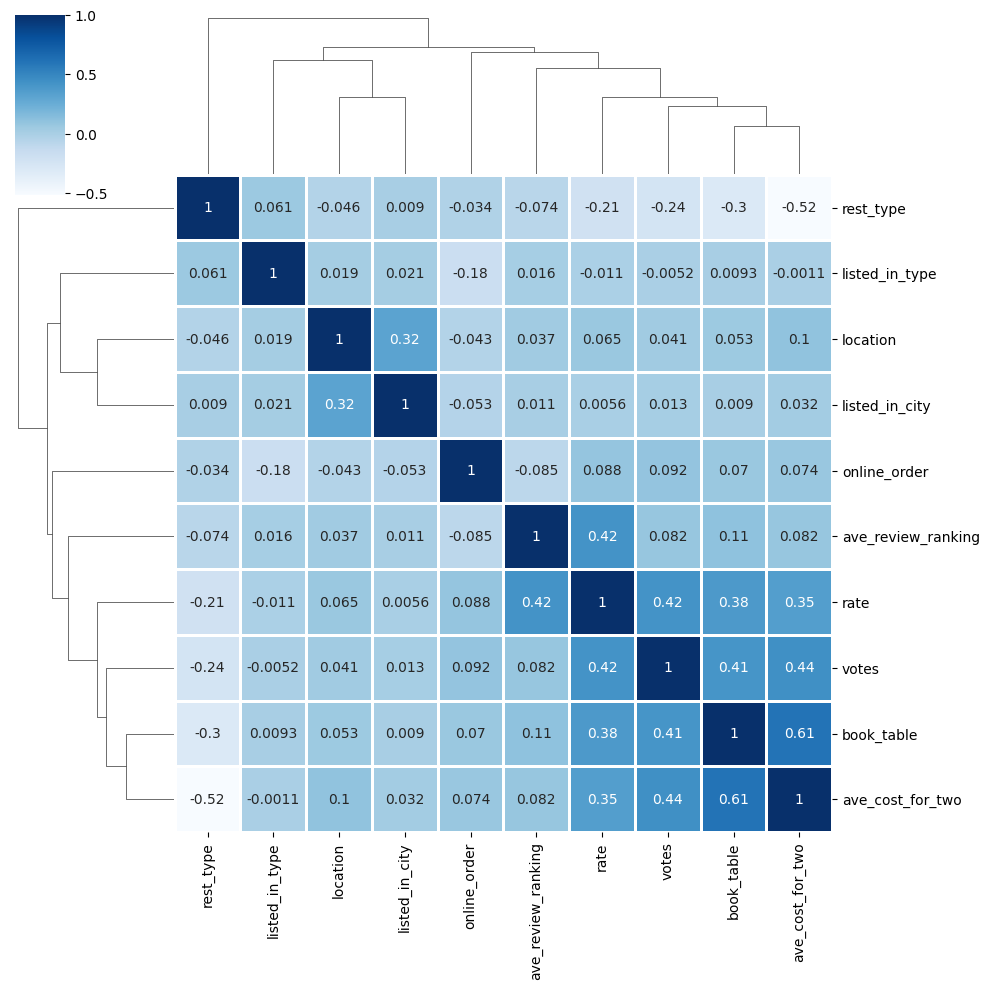

In [ ]:
#visualise clustermap
sns.clustermap(data=food.corr(), cmap="Blues",linewidths=.9, annot=True)
plt.show()

In [ ]:
print (food.info)

<bound method DataFrame.info of                       name  location  rest_type                               cuisines  listed_in_type  listed_in_city  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate
0                 D2V Cafe         3          1                                   Cafe               1              12             0           0           700.000     13               4.750 3.600
1         The Burger Place        41          5         Burger, Continental, Fast Food               4              17             1           0           400.000     28               4.500 3.800
2              Millet Mama         4          5             South Indian, Healthy Food               2              13             1           0           200.000     18               4.000 3.900
3                Red Onion        78          2  Chinese, North Indian, Biryani, Kebab               2               5             1           1          1200.000    550               

##Heatmap to check which numerical column is matching best with Rate

<ipython-input-67-5d15c6a484e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data=food.corr(), cmap="Blues",linewidths=.9, annot=True)


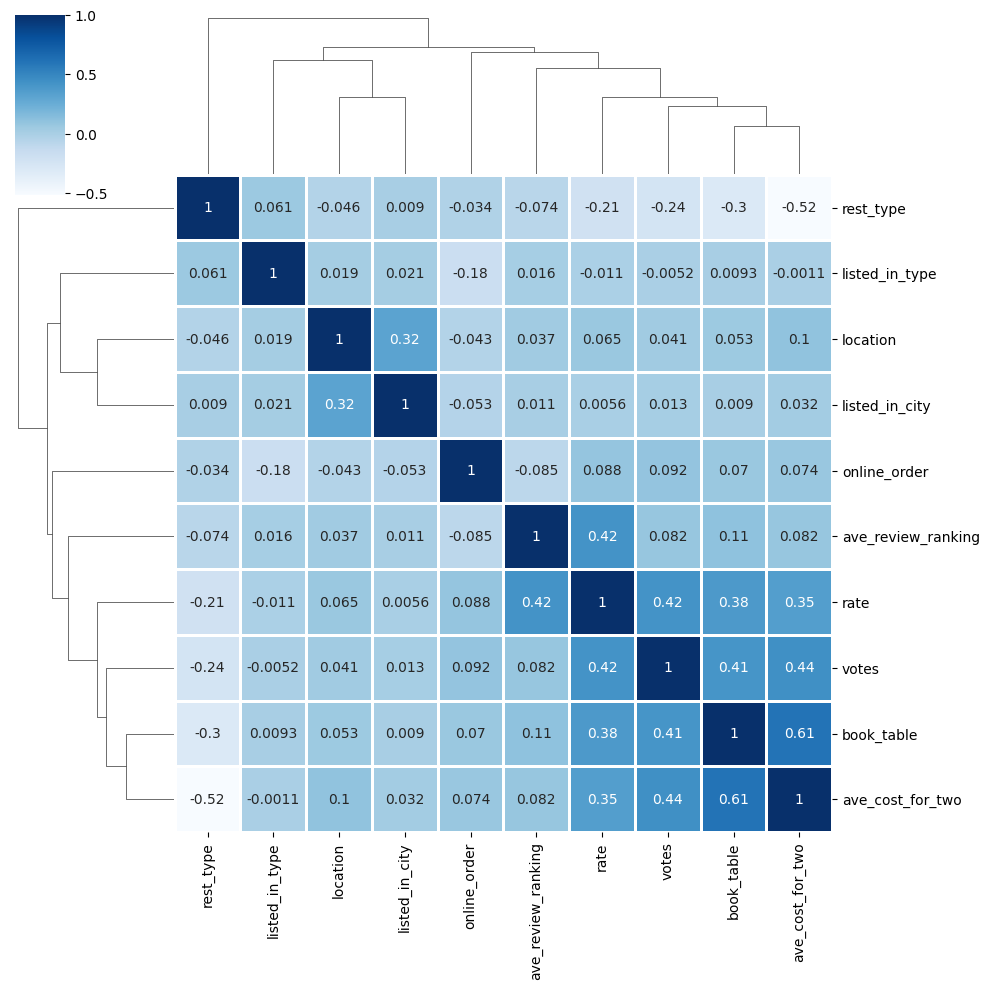

In [ ]:
#visualise clustermap
sns.clustermap(data=food.corr(), cmap="Blues",linewidths=.9, annot=True)
plt.show()


#Feature selection and target specification

In [ ]:
#Define predictors and label

X = ['ave_cost_for_two','book_table','ave_review_ranking','votes']
X= food[X]
y=food['rate']

# Applying Model- 1 (KNN)
Supervised machine learning model


In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Import KNN classifier class
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from sklearn.preprocessing import StandardScaler

Data spliting

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2023)

In [ ]:
# Features to scale
features_to_scale = ['ave_cost_for_two','ave_review_ranking', 'votes']

# Features to keep
features_to_keep = ['book_table']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the features to scale on the training data
X_train_scaled_values = scaler.fit_transform(X_train[features_to_scale])

# Transform the features to scale on the test data
X_test_scaled_values = scaler.transform(X_test[features_to_scale])

# Create DataFrames from the scaled values
X_train_scaled = pd.DataFrame(X_train_scaled_values, columns=features_to_scale)
X_test_scaled = pd.DataFrame(X_test_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_train_scaled = pd.concat([X_train_scaled, X_train[features_to_keep].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[features_to_keep].reset_index(drop=True)], axis=1)


In [ ]:
# Normalize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

##  KNN Regressor Model building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Import KNN classifier class
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Train a KNN regressor
k = 15  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)

# Fit the KNN regressor with scaled X_train and y_train
knn.fit(X_train_scaled, y_train)



KNeighborsRegressor(n_neighbors=15)

In [ ]:
# Make predictions on the SCALED testing set
y_pred_knn = knn.predict(X_test_scaled)

##Performance Evaluation
* Root Mean Squared Error (RMSE)measures the differences between predicted and actual values of the target variable.

* Mean Absolute Error (MAE) measures the average magnitude of the errors between predicted and actual values.

* R-Squared (R²) measures the proportion of variance in the target variable that can be explained by the independent variables - also called Coefficient of Determination.

In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_knn})
inspection.head()

,Actual,Predicted
14664,3.800,3.600
13622,3.400,3.540
22241,3.800,3.827
21139,3.800,4.073
34123,4.200,4.207


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_knn)
print(f"R-squared (R²): {r2:.2f}")


R-squared (R²): 0.67


In [ ]:
# Calculate performance metrics for the first model
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_1 = r2_score(y_test, y_pred_knn)
mae_1 = mean_absolute_error(y_test, y_pred_knn)

# Print performance metrics for the first model
print("Root Mean Squared Error: {:.3f}".format(rmse_1))
print("R Squared: {:.3f}".format(r2_1))
print("Absolute Squared Error: {:.3f}".format(mae_1))

Root Mean Squared Error: 0.223
R Squared: 0.669
Absolute Squared Error: 0.142


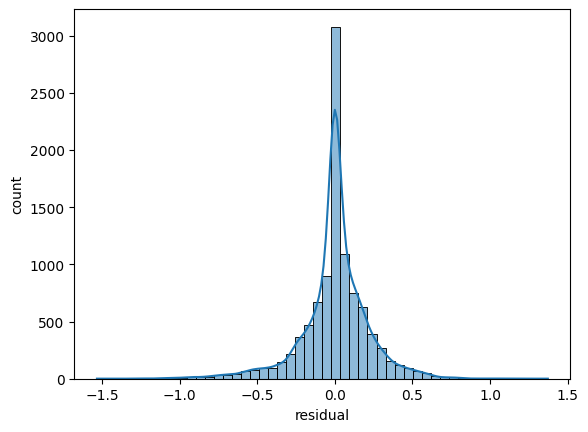

In [ ]:
# Plot residuals, i.e. the differences between the actual and predicted values.
sns.histplot(x=y_test-y_pred_knn, bins=50, kde=True)
plt.xlabel('residual')
plt.ylabel('count')
plt.show()

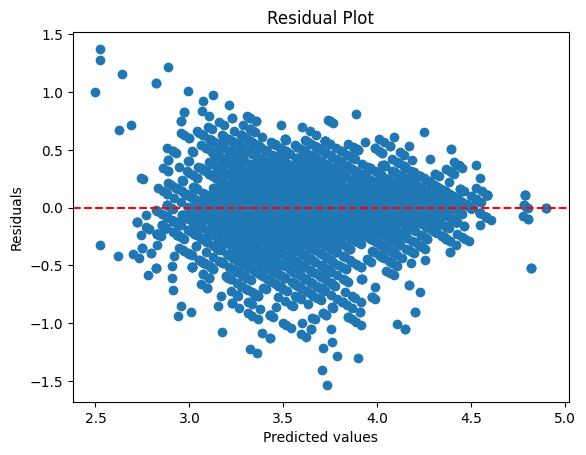

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred_knn, y_test-y_pred_knn)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

## Optimising k
based on rmse


In [ ]:
# Define a list of k values to test
k_values = list(range(1, 31))

# Train and evaluate KNN classifiers with different k values

best_k=5
best_rmse=5400
error_rates=[]
for k in k_values:
    knn = KNeighborsRegressor(k)
    knn.fit(X_train_scaled, y_train)
    y_pred=knn.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    error_rates.append(rmse)
    if rmse <= best_rmse:
        best_k = k
        best_rmse = rmse

# Find the best k value with highest accuracy score
print(f"Best k value: {best_k}")
print(f"Best rmse: {best_rmse:.3f}")

Best k value: 2
Best rmse: 0.174


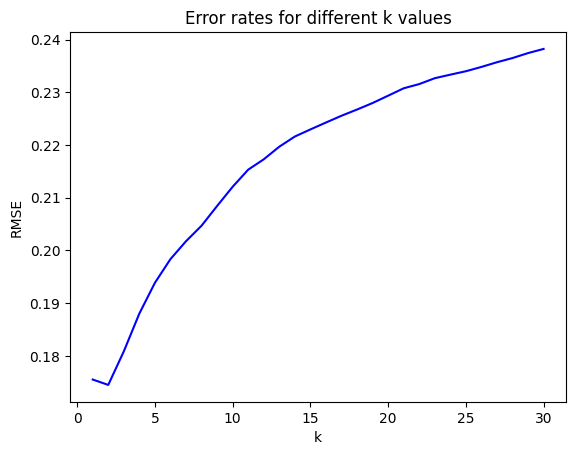

In [ ]:
# Plot k values against accuracy scores
plt.ylabel('RMSE')
plt.xlabel('k')
plt.title('Error rates for different k values')
plt.plot(k_values, error_rates, color='blue')
plt.show()

## Model comparision

* Rebuild the model with the optimal k
* Evaluate the model

In [ ]:
# Create a KNN regressor object
k=6
knn = KNeighborsRegressor(k)

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor(n_neighbors=6)

In [ ]:
# Predict the house prices for the testing data
y_pred_best = knn.predict(X_test_scaled)

In [ ]:
# Calculate performance metrics for the SECOND model
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_2 = r2_score(y_test, y_pred_best)
mae_2 = mean_absolute_error(y_test, y_pred_best)

In [ ]:
# Print performance metrics for the SECOND model
print("Root Mean Squared Error: {:.3f}".format(rmse_2))
print("R Squared: {:.3f}".format(r2_2))
print("Absolute Squared Error: {:.3f}".format(mae_2))

Root Mean Squared Error: 0.198
R Squared: 0.738
Absolute Squared Error: 0.109


In [ ]:
# Write code to print performance metrics for the FIRST model
print("Root Mean Squared Error: {:.3f}".format(rmse_1))
print("R Squared: {:.3f}".format(r2_1))
print("Absolute Squared Error: {:.3f}".format(mae_1))

Root Mean Squared Error: 0.223
R Squared: 0.669
Absolute Squared Error: 0.142


In [ ]:
print (food)

                      name  location  rest_type                               cuisines  listed_in_type  listed_in_city  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate
0                 D2V Cafe         3          1                                   Cafe               1              12             0           0           700.000     13               4.750 3.600
1         The Burger Place        41          5         Burger, Continental, Fast Food               4              17             1           0           400.000     28               4.500 3.800
2              Millet Mama         4          5             South Indian, Healthy Food               2              13             1           0           200.000     18               4.000 3.900
3                Red Onion        78          2  Chinese, North Indian, Biryani, Kebab               2               5             1           1          1200.000    550               4.800 4.300
4      Chaiywaala Da

#Post-analysis
Compare stats of the actual and predicted values

In [ ]:
inspection.Actual.describe()

count   10033.000
mean        3.664
std         0.387
min         2.000
25%         3.500
50%         3.700
75%         3.900
max         4.900
Name: Actual, dtype: float64

In [ ]:
#Similarly, write code to see descriptive stats for inspection.Predicted
inspection.Predicted.describe()

count   10033.000
mean        3.663
std         0.319
min         2.500
25%         3.447
50%         3.700
75%         3.827
max         4.900
Name: Predicted, dtype: float64

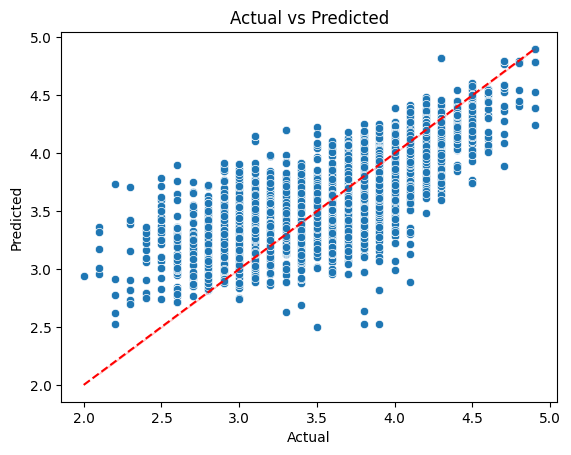

In [ ]:
sns.scatterplot(data=inspection, x=inspection.Actual, y=inspection.Predicted)

# Line where Actual and Predicted are the same
sns.lineplot(x=inspection['Actual'], y=inspection['Actual'], color='red', linestyle='--')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
#run the below if you have problem with 'str' object is not callable - some variable is taken a built in function
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

In [ ]:
residuals_knn = y_test - y_pred_knn

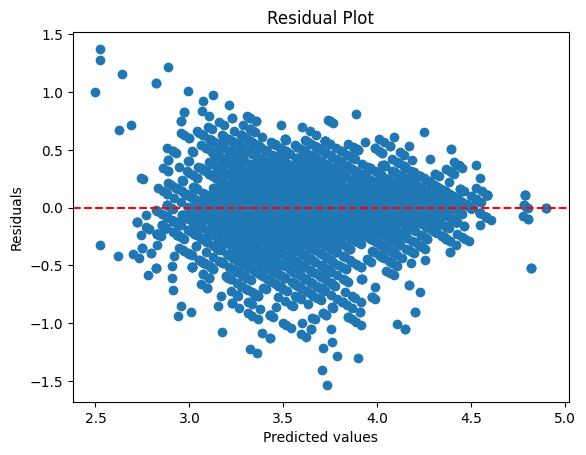

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred_knn, residuals_knn)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

# Cross-validation

# K-fold cross validation

In [ ]:
#Import Kfold
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# Create a KFold object for 5-fold cross-validation with shuffling
kf = KFold(n_splits=10, shuffle=True, random_state=2023)

In [ ]:
# Features to scale
features_to_scale = ['ave_cost_for_two', 'ave_review_ranking', 'votes']

# Features to keep
features_to_keep = ['book_table']

In [ ]:
# Fit and transform the features to scale on the training data
X_scaled_values = scaler.fit_transform(X[features_to_scale])

# Create DataFrames from the scaled values
X_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_scaled = pd.concat([X_scaled, X[features_to_keep].reset_index(drop=True)], axis=1)

In [ ]:
# Initialize KNN Regressor
knn = KNeighborsRegressor(n_neighbors=31)

In [ ]:
  # Perform cross-validation on the KNN model
  neg_mse_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
  r2_scores = cross_val_score(knn, X_scaled, y, cv=kf, scoring='r2')

  # Compute the root mean squared error (RMSE) from the negative mean squared error scores
  rmse_scores = np.sqrt(-neg_mse_scores)

  # Compute the mean and standard deviation of the RMSE scores
  mean_rmse = np.mean(rmse_scores)
  std_rmse = np.std(rmse_scores)

  # Compute the 95% confidence interval for the mean RMSE
  ci_rmse = 1.96 * (std_rmse / np.sqrt(len(rmse_scores)))

  # Compute the mean and standard deviation of r2
  mean_r2 = np.mean(r2_scores)
  std_r2 = np.std(r2_scores)

  # Compute the 95% confidence interval for the mean r2
  ci_r2 = 1.96 * (std_r2 / np.sqrt(len(r2_scores)))


  # Print the results
  print("Average RMSE: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_rmse, mean_rmse - ci_rmse, mean_rmse + ci_rmse))
  print("Average R2: {:.2f} (95% CI: {:.2f}, {:.2f})".format(mean_r2, mean_r2 - ci_r2, mean_r2 + ci_r2))


Average RMSE: 0.24 (95% CI: 0.24, 0.24)
Average R2: 0.62 (95% CI: 0.61, 0.62)


#MLPRegressor model building for the regression problem

In [ ]:
#import MLPRegressor and metric functions
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Initialise an ANN model
ann_reg = MLPRegressor(hidden_layer_sizes=(32,16), activation='relu', solver='adam', max_iter=1000, random_state=2023)

In [ ]:
# Fit it to the scaled training data
ann_reg.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=2023)

In [ ]:
# Use the trained model to predict on the scaled test data
y_pred_mlp= ann_reg.predict(X_test_scaled)

In [ ]:
inspection=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_mlp})
inspection.sample(10)

,Actual,Predicted
12925,3.200,3.363
13530,3.000,3.362
31926,3.700,3.687
35243,3.500,3.534
32344,3.800,3.529
23143,3.900,3.751
38383,3.700,3.694
34890,3.500,3.541
29779,3.700,3.642
20569,3.300,3.494


##Performance Evaluation

Root Mean Squared Error (RMSE)measures the differences between predicted and actual values of the target variable.

Mean Absolute Error (MAE) measures the average magnitude of the errors between predicted and actual values.

R-Squared (R²) measures the proportion of variance in the target variable that can be explained by the independent variables - also called Coefficient of Determination

In [ ]:
# Calculate RMSE, R-squared, and MAE
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
r2_mlp = r2_score(y_test, y_pred_mlp)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# Print the evaluation metrics
print("Scikit learn MLP RMSE: {:.3f}" .format(rmse_mlp))
print("Scikit learn MLP MAE: {:.3f}" .format(mae_mlp))
print("Scikit learn MLP R-squared: {:.3f}" .format(r2_mlp))

Scikit learn MLP RMSE: 0.241
Scikit learn MLP MAE: 0.164
Scikit learn MLP R-squared: 0.612


In [ ]:
inspection.Actual.describe()

count   10033.000
mean        3.664
std         0.387
min         2.000
25%         3.500
50%         3.700
75%         3.900
max         4.900
Name: Actual, dtype: float64

In [ ]:
inspection.Predicted.describe()

count   10033.000
mean        3.673
std         0.284
min         2.783
25%         3.490
50%         3.685
75%         3.827
max         4.715
Name: Predicted, dtype: float64

<Axes: xlabel='Actual', ylabel='Predicted'>

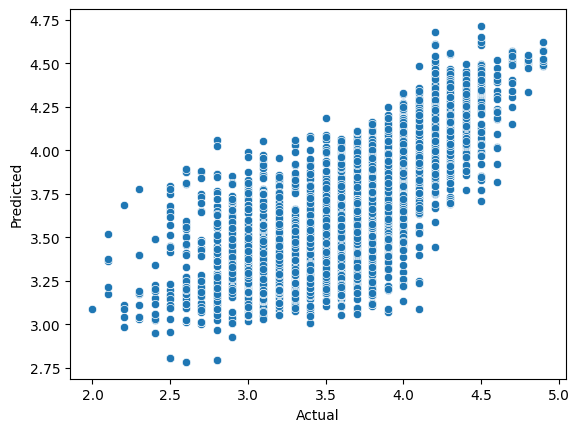

In [ ]:
sns.scatterplot(data=inspection, x='Actual', y='Predicted')

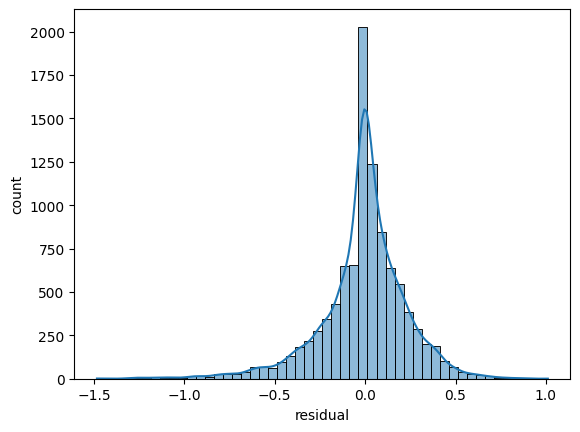

In [ ]:
# Plot residuals, i.e. the differences between the actual and predicted values.
sns.histplot(x=y_test-y_pred_mlp, bins=50, kde=True)
plt.xlabel('residual')
plt.ylabel('count')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

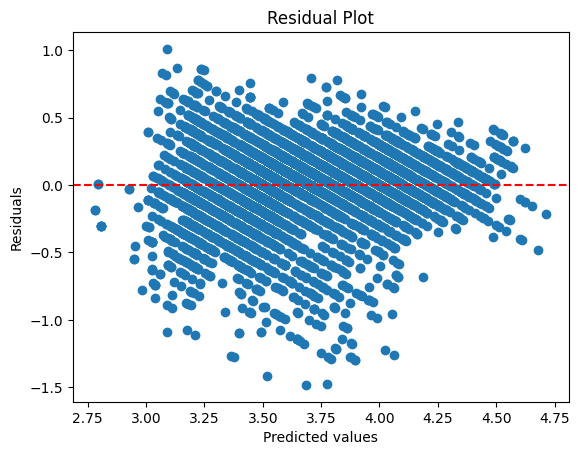

In [ ]:
# Create a scatter plot of residuals against predicted values
plt.scatter(y_pred_mlp, y_test-y_pred_mlp)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.axhline(y=0, color='r', linestyle='--') # Adds a horizontal line at y = 0
plt.show()

#Comparison: Comparison between Knn and MLP model

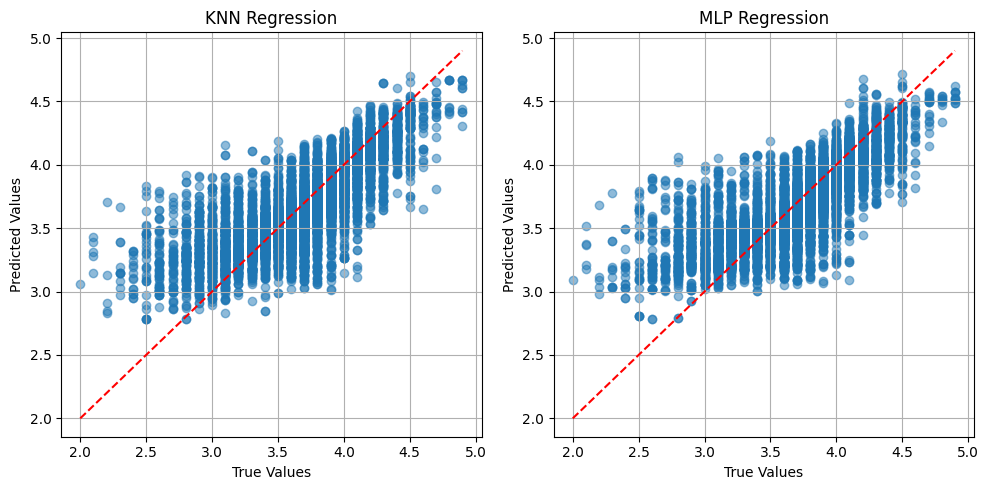

In [ ]:
import matplotlib.pyplot as plt

# Create scatter plots for both models
plt.figure(figsize=(10, 5))

# Scatter plot for KNN
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('KNN Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Scatter plot for MLP
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('MLP Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()


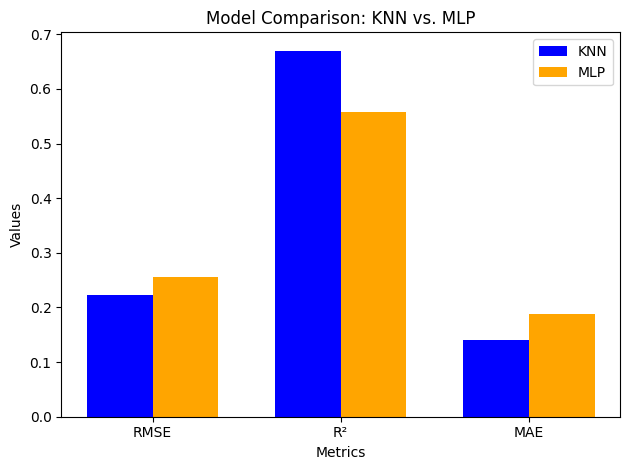

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for KNN model
rmse_knn = 0.222
r2_knn = 0.67
mae_knn = 0.141

# Performance metrics for MLP model
rmse_mlp = 0.256
r2_mlp = 0.557
mae_mlp = 0.188

# Labels for the metrics
metrics = ['RMSE', 'R²', 'MAE']

# Values for KNN and MLP models
knn_values = [rmse_knn, r2_knn, mae_knn]
mlp_values = [rmse_mlp, r2_mlp, mae_mlp]

# Width of each bar
bar_width = 0.35

# X-axis positions for bars
x = np.arange(len(metrics))

# Create bar chart
plt.bar(x - bar_width/2, knn_values, bar_width, label='KNN', color='blue')
plt.bar(x + bar_width/2, mlp_values, bar_width, label='MLP', color='orange')

# Set labels, title, and legend
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Comparison: KNN vs. MLP')
plt.xticks(x, metrics)
plt.legend()

# Display the bar chart
plt.tight_layout()
plt.show()


# Decision Tree Model

### **Data preparation**
* Data conversion
* **Feature selection**
* **Target specification**
* Data spliting
* Data scaling (X_train and X-test)

In [ ]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.parsers.readers import annotations

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regressor

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for model evaluation

#print confusion matrix and evaluation report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Define the predictors
selected_features = ['ave_cost_for_two', 'book_table', 'ave_review_ranking', 'votes']
X = food[selected_features]
y = food['rate']

print(X.head())
print(y.head())

   ave_cost_for_two  book_table  ave_review_ranking  votes
0           700.000           0               4.750     13
1           400.000           0               4.500     28
2           200.000           0               4.000     18
3          1200.000           1               4.800    550
4           250.000           0               3.000     67
0   3.600
1   3.800
2   3.900
3   4.300
4   3.700
Name: rate, dtype: float64


## Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set 70% and test set 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  # 70% training and 30% testing

#inspect the split datasets
print(X_train.head())
print(y_train.head())

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)

       ave_cost_for_two  book_table  ave_review_ranking  votes
26701           600.000           0               4.000     59
9316            600.000           0               4.500     14
9580            600.000           0               5.000      0
16075           400.000           0               4.000      8
29115           600.000           0               3.000    181
26701   3.700
9316    3.900
9580    3.700
16075   3.400
29115   3.900
Name: rate, dtype: float64
Training dataset size: (28091, 4)
Test dataset size: (12039, 4)


In [ ]:
regressor = DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [ ]:
#Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
#instantiate a decision tree regressor and fit it with the training data
regressor = DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

regressor

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [ ]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, max_leaf_nodes=15, random_state=1)

In [ ]:
#predict rate
y_pred = regressor.predict(X_test)

In [ ]:
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.0f' % x)
votes=X_test['votes']

#inspection
inspection=pd.DataFrame({'votes':votes, 'Actual':y_test, 'Predicted':y_pred})
inspection.head(20)

,votes,Actual,Predicted
12270,554,4,4
38400,22,4,4
1827,330,4,4
3758,4,3,3
34889,0,4,4
22188,6,3,3
34767,33,3,3
13788,229,2,4
32155,49,4,4
10365,14,3,3


##Evaluate Model performance

In [ ]:
#Evaluate the model
from sklearn import metrics
print('Mean Absolute Error:', '%.3f' % metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', '%.3f' % metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', '%.3f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Calculate and print R-squared (R^2) score
r_squared = r2_score(y_test, y_pred)
print('R-squared (R^2):', '%.3f'%r_squared)

Mean Absolute Error: 0.162
Mean Squared Error: 0.063
Root Mean Squared Error: 0.252
R-squared (R^2): 0.573


In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
inspection['Actual'].describe()

count   12039
mean        4
std         0
min         2
25%         4
50%         4
75%         4
max         5
Name: Actual, dtype: float64

In [ ]:
inspection['Predicted'].describe()

count   12039
mean        4
std         0
min         3
25%         4
50%         4
75%         4
max         4
Name: Predicted, dtype: float64

## Visualise the Trees

In [ ]:
#Import plot_tree to  extract rules and visualise the decition tree model
from sklearn.tree import plot_tree, export_text
from pandas.io.parsers.readers import annotations

In [ ]:
# Convert feature_names to a list if it's an Index object
feature_names = list(selected_features) if isinstance(selected_features, pd.Index) else selected_features

# Extract the decision rules
rules = export_text(regressor, feature_names=feature_names)
print(rules)

|--- votes <= 304.50
|   |--- ave_review_ranking <= 3.36
|   |   |--- votes <= 2.00
|   |   |   |--- value: [3.70]
|   |   |--- votes >  2.00
|   |   |   |--- ave_review_ranking <= 3.00
|   |   |   |   |--- ave_review_ranking <= 2.50
|   |   |   |   |   |--- value: [3.15]
|   |   |   |   |--- ave_review_ranking >  2.50
|   |   |   |   |   |--- value: [3.29]
|   |   |   |--- ave_review_ranking >  3.00
|   |   |   |   |--- votes <= 20.50
|   |   |   |   |   |--- value: [3.28]
|   |   |   |   |--- votes >  20.50
|   |   |   |   |   |--- value: [3.50]
|   |--- ave_review_ranking >  3.36
|   |   |--- votes <= 48.50
|   |   |   |--- votes <= 1.50
|   |   |   |   |--- value: [3.70]
|   |   |   |--- votes >  1.50
|   |   |   |   |--- votes <= 13.50
|   |   |   |   |   |--- value: [3.38]
|   |   |   |   |--- votes >  13.50
|   |   |   |   |   |--- value: [3.64]
|   |   |--- votes >  48.50
|   |   |   |--- ave_review_ranking <= 4.07
|   |   |   |   |--- votes <= 98.50
|   |   |   |   |   |--- va

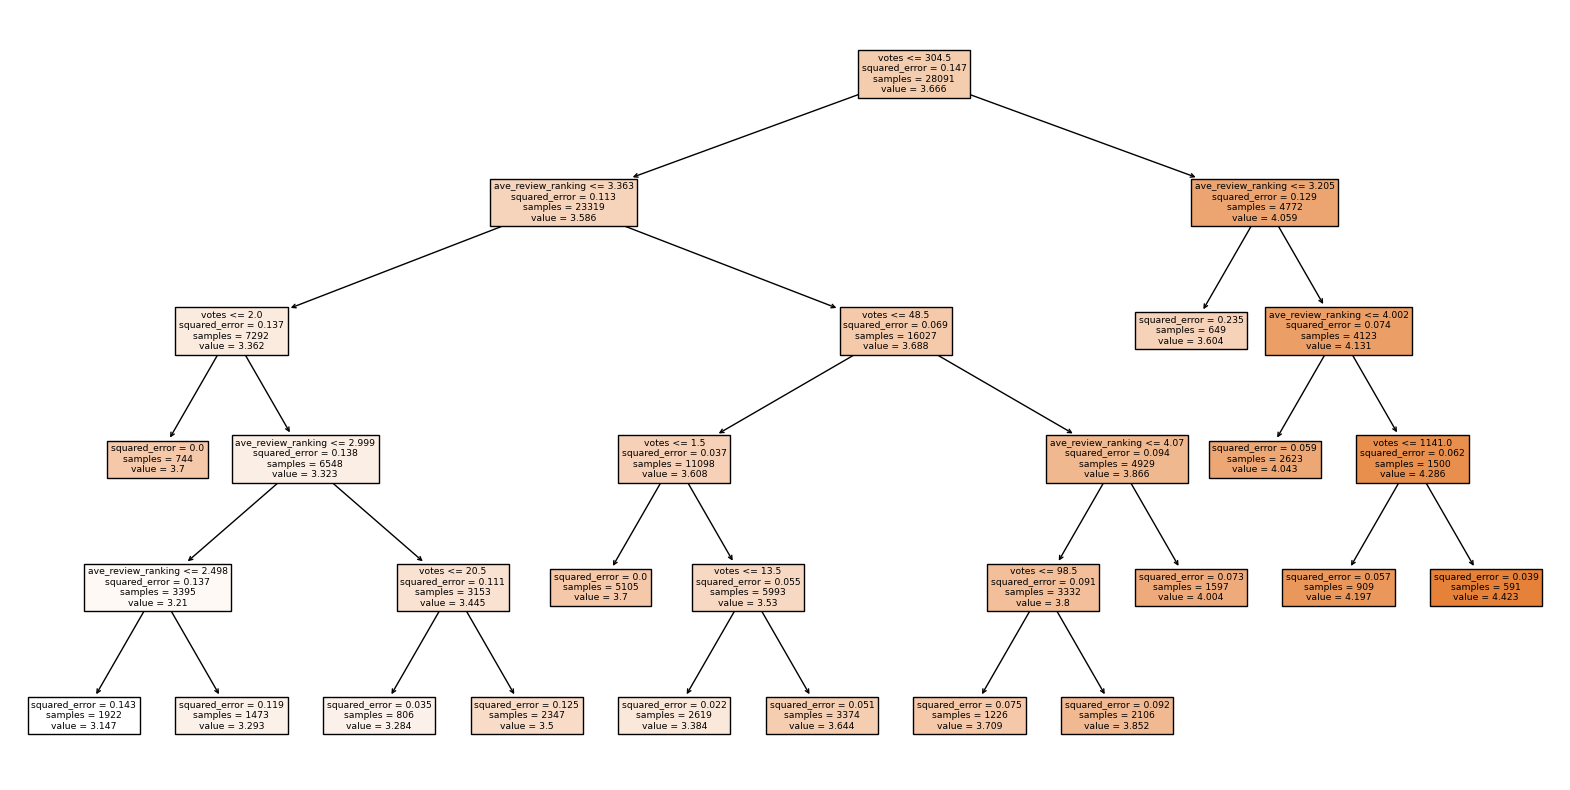

In [ ]:
# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(regressor, filled=True, feature_names=selected_features, class_names=['0','1'])
plt.show()

#Compare between three modals

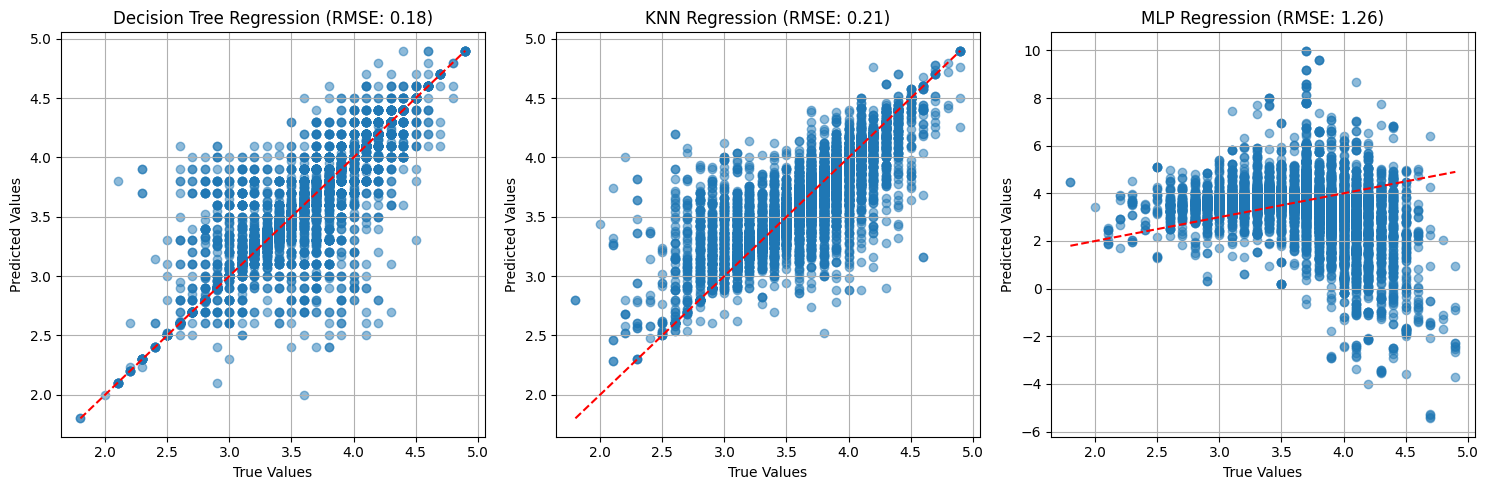

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset and prepare the features (X) and target (y)
# Assuming you have X and y defined as in your previous code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize regressors for Decision Tree, KNN, and MLP
decision_tree = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
mlp = MLPRegressor(random_state=42)

# Train the models
decision_tree.fit(X_train, y_train)
knn.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# Make predictions
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_mlp = mlp.predict(X_test)

# Calculate RMSE (Root Mean Squared Error) for each model
rmse_decision_tree = np.sqrt(mean_squared_error(y_test, y_pred_decision_tree))
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))

# Create scatter plots for all models
plt.figure(figsize=(15, 5))

# Scatter plot for Decision Tree
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_decision_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title(f'Decision Tree Regression (RMSE: {rmse_decision_tree:.2f})')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Scatter plot for KNN
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title(f'KNN Regression (RMSE: {rmse_knn:.2f})')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)

# Scatter plot for MLP
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_mlp, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title(f'MLP Regression (RMSE: {rmse_mlp:.2f})')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()


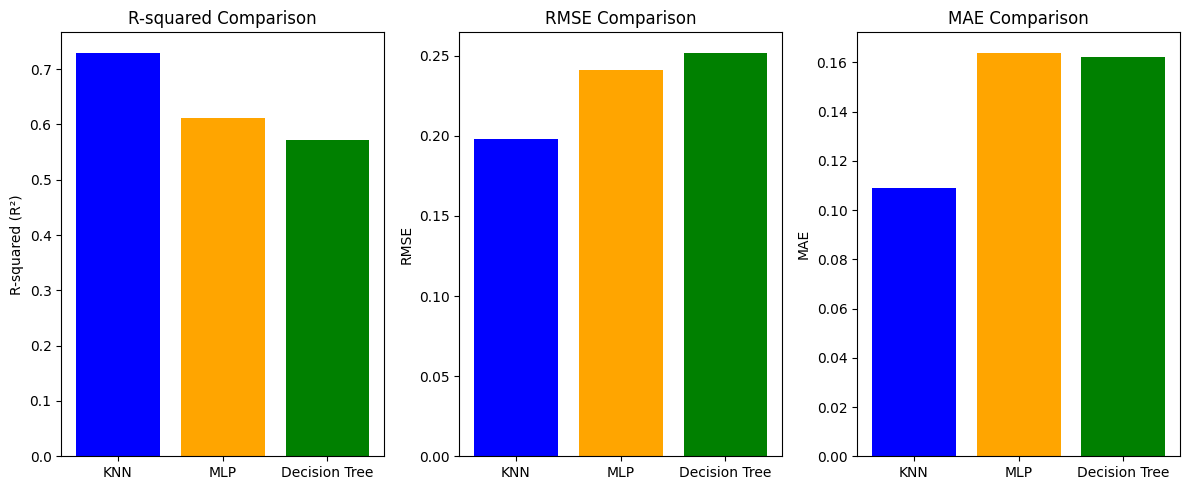

In [ ]:
import matplotlib.pyplot as plt

# Performance metrics for each model
models = ['KNN', 'MLP', 'Decision Tree']
r_squared = [0.73, 0.612, 0.572]
rmse = [0.198, 0.241, 0.252]
mae = [0.109, 0.164, 0.162]

# Create subplots for each metric
plt.figure(figsize=(12, 5))

# R-squared (R²)
plt.subplot(1, 3, 1)
plt.bar(models, r_squared, color=['blue', 'orange', 'green'])
plt.ylabel('R-squared (R²)')
plt.title('R-squared Comparison')

# Root Mean Squared Error (RMSE)
plt.subplot(1, 3, 2)
plt.bar(models, rmse, color=['blue', 'orange', 'green'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

# Mean Absolute Error (MAE)
plt.subplot(1, 3, 3)
plt.bar(models, mae, color=['blue', 'orange', 'green'])
plt.ylabel('MAE')
plt.title('MAE Comparison')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Unsupervised machine learning model


In [ ]:
# import libraries
import pandas as pd #for data manipulation and analysis
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install pydotplus #interface for graph visualisation
!pip install graphviz #for graph visualisation

In [ ]:
print (food)

                      name  location  rest_type                               cuisines  listed_in_type  listed_in_city  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate
0                 D2V Cafe         3          1                                   Cafe               1              12             0           0               700     13                   5     4
1         The Burger Place        41          5         Burger, Continental, Fast Food               4              17             1           0               400     28                   4     4
2              Millet Mama         4          5             South Indian, Healthy Food               2              13             1           0               200     18                   4     4
3                Red Onion        78          2  Chinese, North Indian, Biryani, Kebab               2               5             1           1              1200    550                   5     4
4      Chaiywaala Da

## Features selection

In [ ]:
features=['ave_cost_for_two', 'book_table', 'ave_review_ranking', 'votes',] #Explore with your own feature selection
X=food[features]

##Spliting and scaling data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Features to scale
features_to_scale = ['ave_cost_for_two','ave_review_ranking', 'votes']

# Features to keep
features_to_keep = ['book_table']

In [ ]:
# Scale the features using Min-Max Scaling
scaler = MinMaxScaler()

In [ ]:
# Fit and transform the features to scale
X_scaled_values = scaler.fit_transform(X[features_to_scale])

# Create DataFrames from the scaled values
X_scaled = pd.DataFrame(X_scaled_values, columns=features_to_scale)

# Concatenate the unscaled features back into the scaled DataFrames
X_scaled = pd.concat([X_scaled, X[features_to_keep].reset_index(drop=True)], axis=1)

In [ ]:
X_scaled.describe()

,ave_cost_for_two,ave_review_ranking,votes,book_table
count,40130,40130,40130,40130
mean,0,1,0,0
std,0,0,0,0
min,0,0,0,0
25%,0,1,0,0
50%,0,1,0,0
75%,0,1,0,0
max,1,1,1,1


## K-Means clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

###Model building

In [ ]:
# Fit K-means clustering model with an initially selected number of clusters
k=2
kmeans = KMeans(n_clusters=k, n_init='auto', max_iter=300, random_state=2023)

#Write code to fit kmeans with X_scaled
kmeans.fit(X_scaled)


KMeans(n_clusters=2, n_init='auto', random_state=2023)

In [ ]:
# Add cluster labels to original dataset; not necesarry as we will optimise k later
food['Cluster'] = kmeans.labels_

###Performance Evaluation and Optimisation
1. Within-Cluster Sum of Squares

2. Silhouette score

3. k optimisation

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)


Within-Cluster Sum of Squares (WCSS): 5024.889


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

Davies Bouldin index: 1.253


In [ ]:
# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Silhouette score: 0.259


In [ ]:
#Import funtions to visualise silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Within-Cluster Sum of Squares (WCSS): 5024.889
Davies Bouldin index: 1.253
Silhouette score: 0.259


The Davies-Bouldin Index (DBI) and Silhouette score

Silhouette score measures how well-separated the clusters are, and how similar the data points are within each cluster.

The silhouette score ranges from -1 to 1.
A score of 1 means that the data points within a cluster are very similar to each other, and very different from the data points in other clusters.
0.7 or higher: the clustering is good.
0.5 to 0.7: the clustering is fair.
below 0.5: clustering is poor.
A score of 0 means that the data points are equally similar to neighboring clusters.
A negative score means that the data points may have been assigned to the wrong cluster, there may be noise or outliers. clustering is sensitive to initiatlisation. Try it gain.

In [ ]:
#Import funtions to visualise silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.cm as cm

In [ ]:
#fit kmeans with X_scaled to get labels
cluster_labels = kmeans.fit_predict(X_scaled)

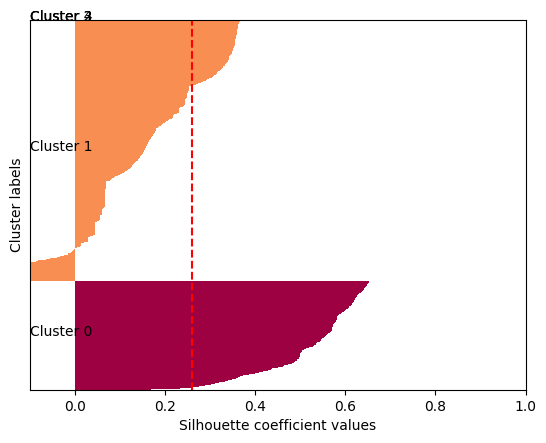

In [ ]:
# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Plot silhouette diagram
n_clusters = 5
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.Spectral

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

plt.show()

In [ ]:
# Determine optimal number of clusters using the SSE metric
sse_scores = []
best_k=2
best_sse_score=4622.613
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sse_score_i=kmeans.inertia_
  sse_scores.append(sse_score_i)
  if best_sse_score > sse_score_i:
    best_k = i
    best_sse_score = sse_score_i

print('Best k: ', best_k)
print('Best within cluster sum of squarred error score: ', '%.3f' %best_sse_score)

Best k:  39
Best within cluster sum of squarred error score:  126.469


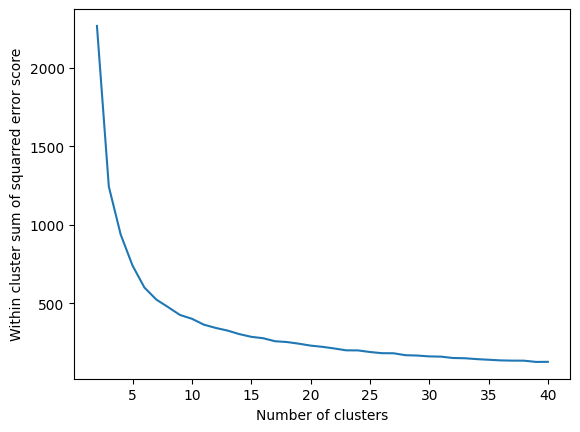

In [ ]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sse_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squarred error score")
plt.show()

In [ ]:
# Determine optimal number of clusters using silhouette score
sil_scores = []
best_k=2
best_sil_score=0
for i in range(2, 41):
  kmeans = KMeans(n_clusters=i, n_init=2)
  kmeans.fit(X_scaled)
  sil_score_i=silhouette_score(X_scaled, kmeans.labels_)
  sil_scores.append(sil_score_i)
  if best_sil_score < sil_score_i:
    best_k = i
    best_sil_score = sil_score_i

print('Best k: ', best_k)
print('Best silhouette score: ', '%.3f' %best_sil_score)

Best k:  2
Best silhouette score:  0.745


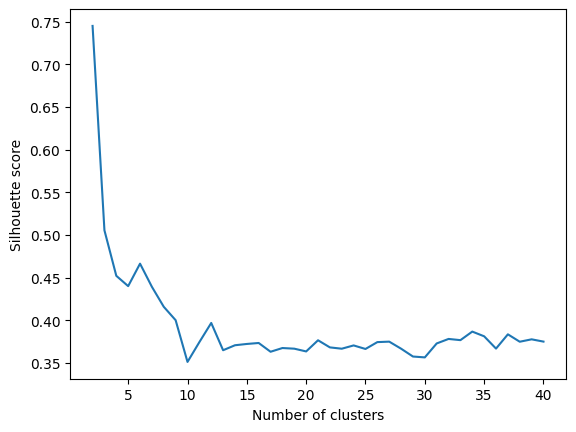

In [ ]:
# Plot the silhouette scores to determine optimal number of clusters
plt.plot(range(2,41), sil_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()


#Let's create a graph to observe both metrics

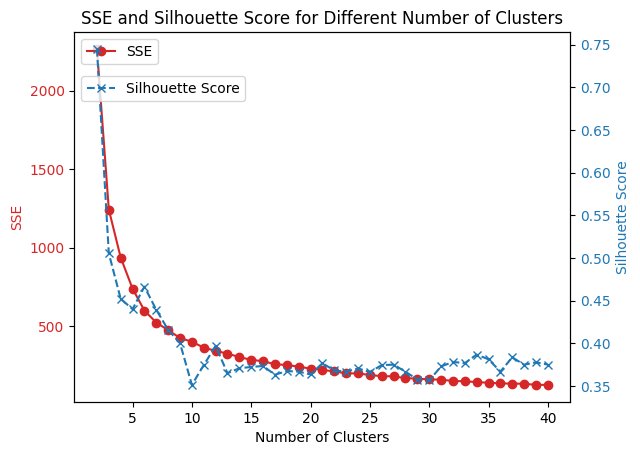

In [ ]:
# Create a figure and a set of subplots (two y-axes)
fig, ax1 = plt.subplots()

cluster_range = range(2, 41)

# Plot SSE
color = 'tab:red'
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('SSE', color=color)
ax1.plot(cluster_range, sse_scores, marker='o', label='SSE', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create the second y-axis to plot Silhouette Score
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(cluster_range, sil_scores, marker='x', linestyle='--', label='Silhouette Score', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show legend
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, 1.0))
ax2.legend(loc='upper left', bbox_to_anchor=(0.0, 0.9))

# Show plot
plt.title("SSE and Silhouette Score for Different Number of Clusters")
plt.show()

#Model Selection

In [ ]:
# Set the number of clusters
n_clusters = 5

# Fit K-means clustering model
kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=2023)
cluster_labels = kmeans.fit_predict(X_scaled)

# Write code to add cluster labels to original dataset
food['Cluster'] = kmeans.labels_

In [ ]:
# Evaluate the model using within-cluster sum of squares (WCSS)
wcss = kmeans.inertia_
print("Within-Cluster Sum of Squares (WCSS):", '%.3f' % wcss)

# Write code to compute the Davies-Bouldin index
dbs = davies_bouldin_score(X_scaled, kmeans.labels_)
print("Davies Bouldin index:", '%.3f' % dbs)

# Write code to compute the Silhouette score for the clustering model
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

print('Silhouette score:', '%.3f' % silhouette_avg)

Within-Cluster Sum of Squares (WCSS): 759.351
Davies Bouldin index: 0.680
Silhouette score: 0.459


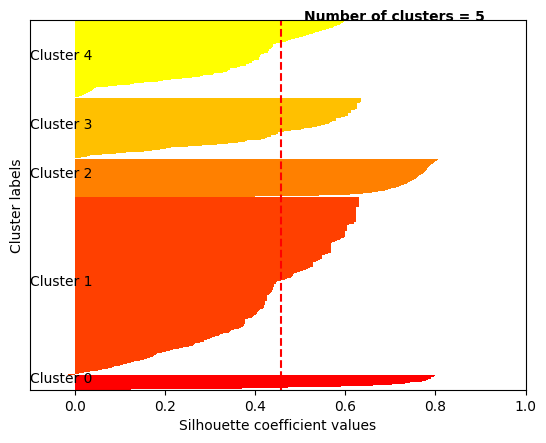

In [ ]:
# Compute silhouette scores
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

# Define the colormap, options include: autumn, Spectral, viridis, plasma, cool, jet
cmap = cm.autumn

# Create a list of evenly spaced values in the range [0, 1]
values = np.linspace(0, 1, n_clusters)

# Plot silhouette diagram
fig, ax = plt.subplots()
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper += size_cluster_i
    color = cmap(values[i])
    ax.barh(range(y_lower, y_upper), ith_cluster_silhouette_values, height=1.0,
            edgecolor='none', color=color)
    ax.text(-0.1, (y_lower + y_upper) / 2, 'Cluster ' + str(i), color='black', fontsize=10)
    y_lower += size_cluster_i

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster labels")
ax.set_yticks([])
ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

ax.text(silhouette_avg + 0.05, len(X_scaled) + 5, "Number of clusters = %d" % n_clusters, fontsize=10, fontweight='bold')

plt.show()

#Post-analysis for Cluster Profiling

###Now that we have Clustered assigned to each data point, we can examine the cluster desriptive stats and visualisation

##Examine the Cluster size

In [ ]:
food

,name,location,rest_type,cuisines,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate,Cluster
0,D2V Cafe,3,1,Cafe,1,12,0,0,700,13,5,4,3
1,The Burger Place,41,5,"Burger, Continental, Fast Food",4,17,1,0,400,28,4,4,3
2,Millet Mama,4,5,"South Indian, Healthy Food",2,13,1,0,200,18,4,4,1
3,Red Onion,78,2,"Chinese, North Indian, Biryani, Kebab",2,5,1,1,1200,550,5,4,2
4,Chaiywaala Da Dhaba,60,1,"Cafe, Tea",4,24,1,0,250,67,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40125,Yumlane,9,6,"Pizza, Fast Food",2,29,0,0,507,25,2,3,4
40126,American Desserts,2,6,"Desserts, Bakery",2,15,1,0,500,23,3,4,1
40127,New Arya Bhavan,52,5,"Street Food, Beverages, North Indian",2,21,0,0,300,23,3,3,1
40128,Le Charcoal Xpress,22,5,"Arabian, BBQ, Rolls, Chinese",2,4,1,0,500,162,4,4,1


In [ ]:
cluster_count=food.Cluster.value_counts()
cluster_count

1    19383
4     8422
3     6616
2     4094
0     1615
Name: Cluster, dtype: int64

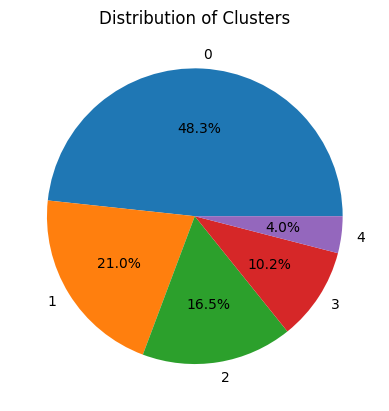

In [ ]:
#Let's generate a pie chart with the distribution of churned cases, along with percentage labels.

# Sort the index to ensure the clusters are in order
sorted_cluster_count = cluster_count.sort_index()
colours = sns.color_palette("tab10", n_colors=len(cluster_count))

plt.pie(cluster_count, labels=sorted_cluster_count.index, autopct='%1.1f%%', colors=colours)
plt.title('Distribution of Clusters')
plt.show()

Examine Cluster vs each of other variables

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
mi_scores = {}

# Loop through each categorical feature and calculate MI score
for cat_feature in cat_data:
    mi_scores[cat_feature] = mutual_info_score(food[cat_feature], food['Cluster'])

# Sort features by their MI scores
sorted_scores = sorted(mi_scores.items(), key=lambda x: x[1], reverse=True)

# Display the scores
for feature, score in sorted_scores:
    print(f"{feature}: {score:.3f}")


book_table: 0.329
online_order: 0.012


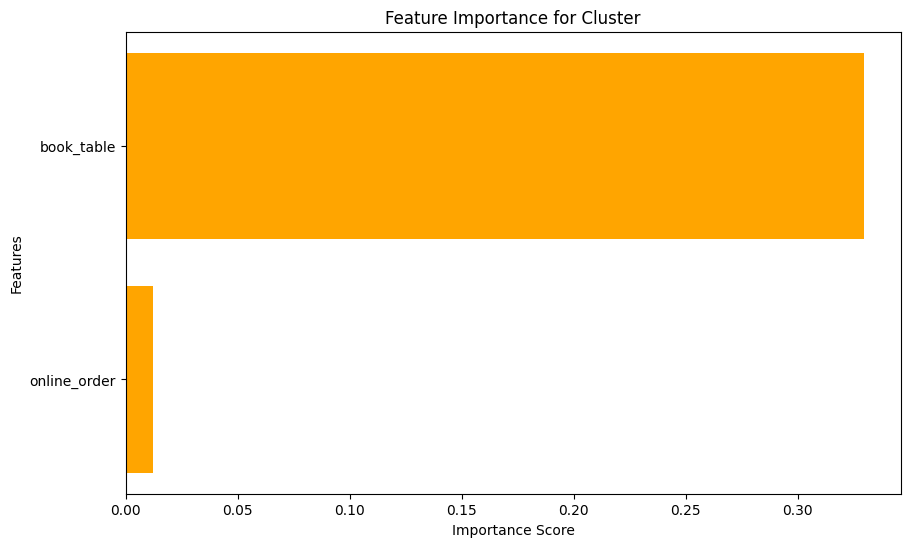

In [ ]:
features, scores = zip(*sorted_scores)
plt.figure(figsize=(10, 6))
plt.barh(features, scores, color='orange')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Cluster')
plt.gca().invert_yaxis()
plt.show()

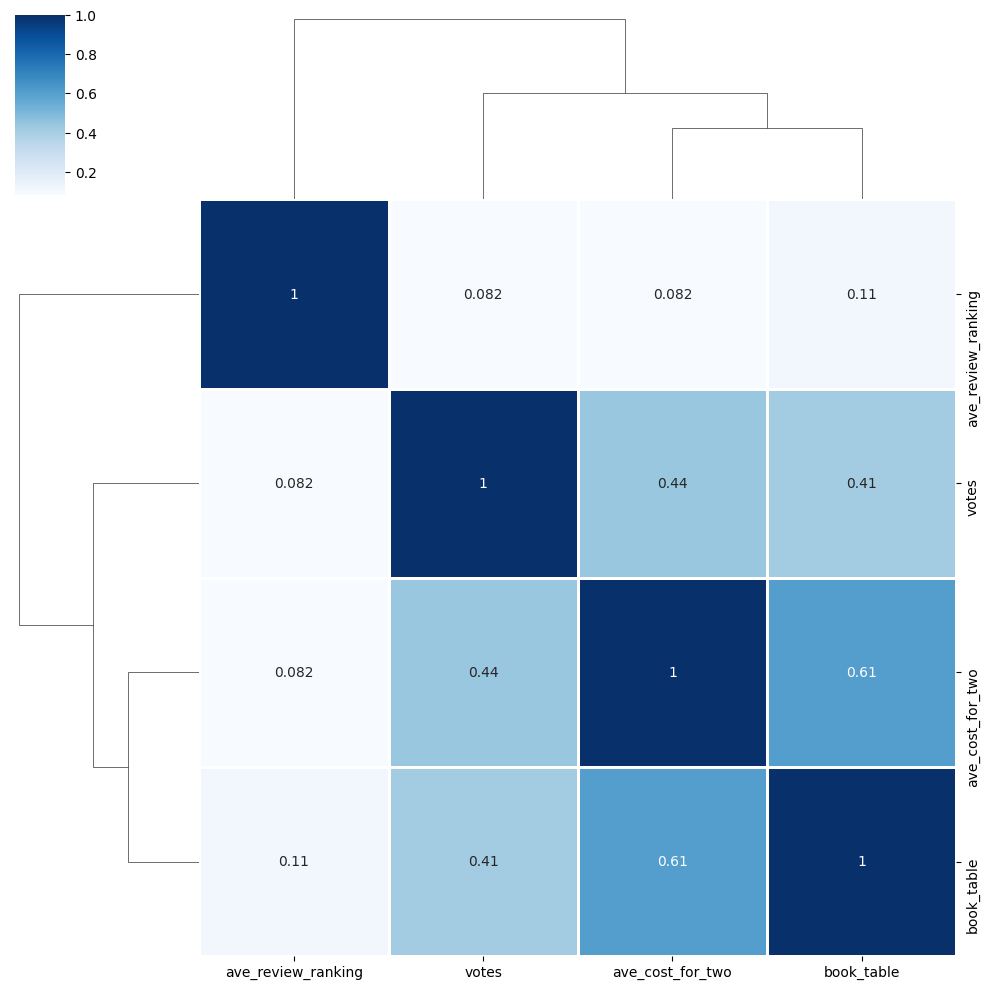

In [ ]:
#visualise clustermap
sns.clustermap(data=food[['ave_cost_for_two', 'book_table', 'ave_review_ranking', 'votes']].corr(), cmap="Blues", linewidths=.9, annot=True)

Cluster  book_table
0        0              1615
1        0             19383
2        1              4094
3        0              6616
4        0              8422
Name: book_table, dtype: int64




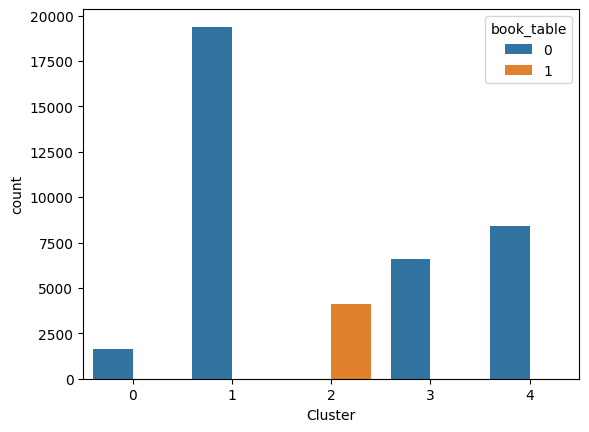

In [ ]:
print(food.groupby('Cluster')['book_table'].value_counts())
print('\n')
sns.countplot(hue=food['book_table'], x=food['Cluster'], palette='tab10')
plt.show()

Cluster  book_table
0        0              1615
1        0             19383
2        1              4094
3        0              6616
4        0              8422
Name: book_table, dtype: int64




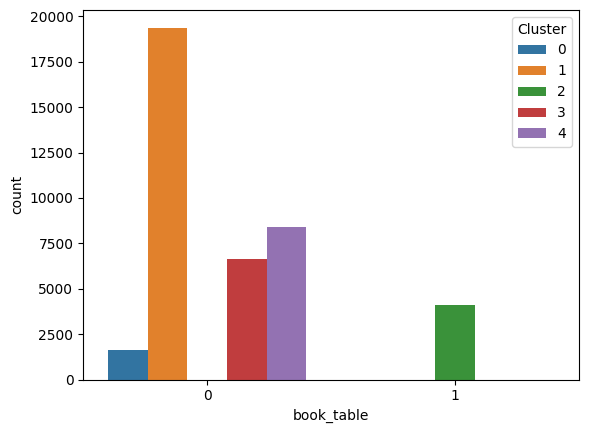

In [ ]:
print(food.groupby('Cluster')['book_table'].value_counts())
print('\n')
sns.countplot(hue=food['Cluster'], x=food['book_table'], palette='tab10')
plt.show()


votes :

         count  mean  std  min  25%  50%  75%   max
Cluster                                            
0         1615    42   72    0    0   10   49   559
1        19383   170  464    0    0   25  138  8185
2         4094   958 1200    0  210  560 1281 12121
3         6616   119  441    0    6   19   72  7137
4         8422   116  253    0   14   46  128  8304




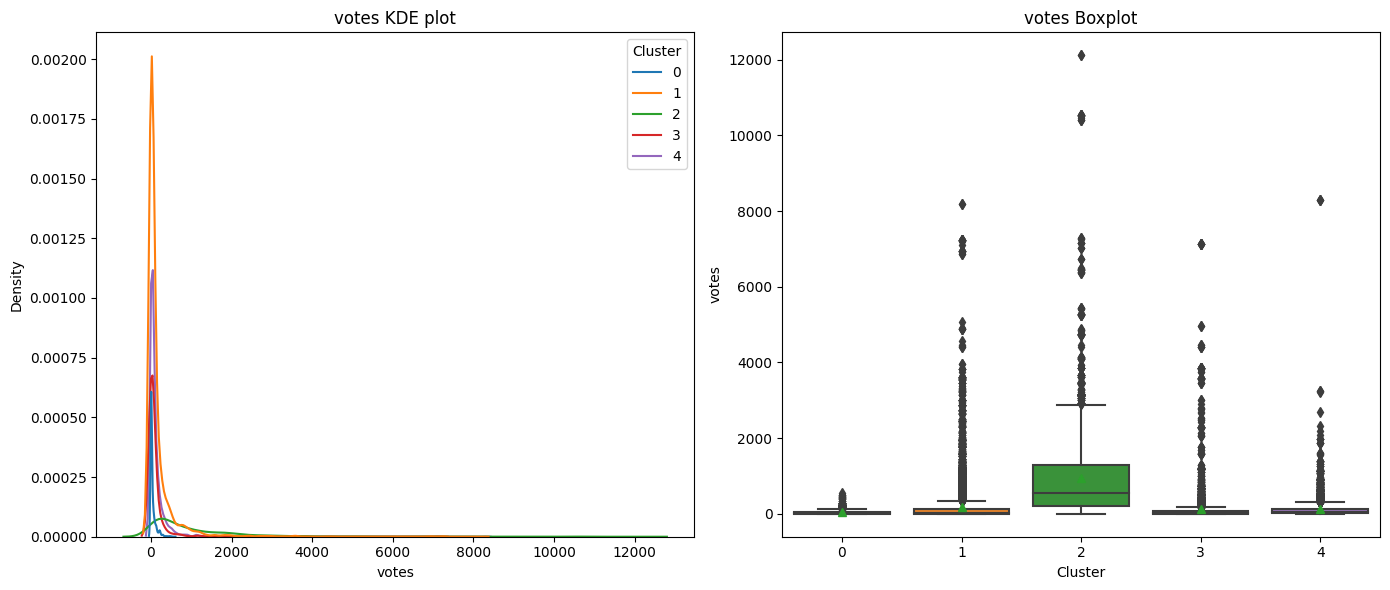

ave_cost_for_two :

         count  mean  std  min  25%  50%  75%  max
Cluster                                           
0         1615   410  173  100  300  400  500 1200
1        19383   439  243   40  300  400  600 2200
2         4094  1088  393  200  800 1000 1400 2500
3         6616   437  251   50  300  400  500 2000
4         8422   453  218   40  300  400  600 2000




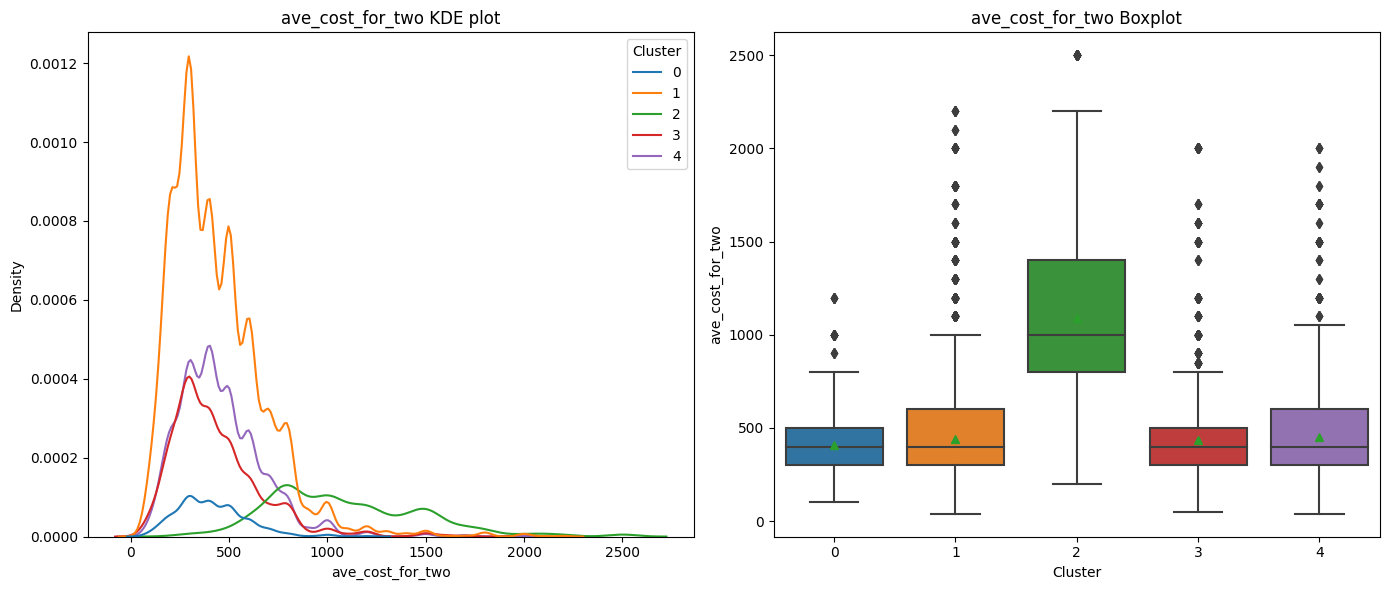

ave_review_ranking :

         count  mean  std  min  25%  50%  75%  max
Cluster                                           
0         1615     1    0    1    1    1    1    2
1        19383     4    0    3    4    4    4    4
2         4094     4    1    1    4    4    4    5
3         6616     5    0    4    4    5    5    5
4         8422     3    0    2    2    3    3    3




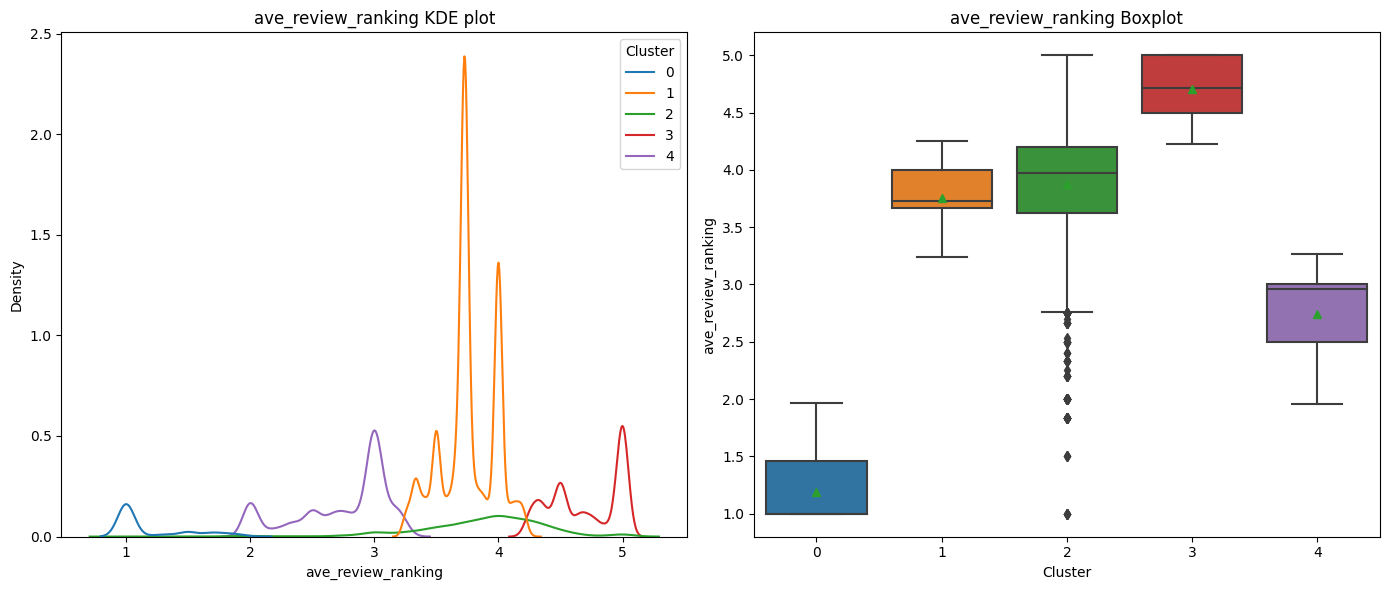

In [ ]:
nums=['votes','ave_cost_for_two','ave_review_ranking']
for i in nums:
  print(i, ':\n')
  print(food.groupby('Cluster')[i].describe())
  print('\n')

  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=(14, 6))

  # Plot KDE on the first subplot
  sns.kdeplot(data=food, x=i, hue='Cluster', ax=axes[0], palette='tab10')
  axes[0].set_title(f'{i} KDE plot')

  # Plot Boxplot on the second subplot
  sns.boxplot(x='Cluster', y=i, data=food, showmeans=True, ax=axes[1], palette='tab10')
  axes[1].set_title(f'{i} Boxplot')

  plt.tight_layout()  # Adjust layout so plots do not overlap
  plt.show()

<Axes: xlabel='Cluster', ylabel='votes'>

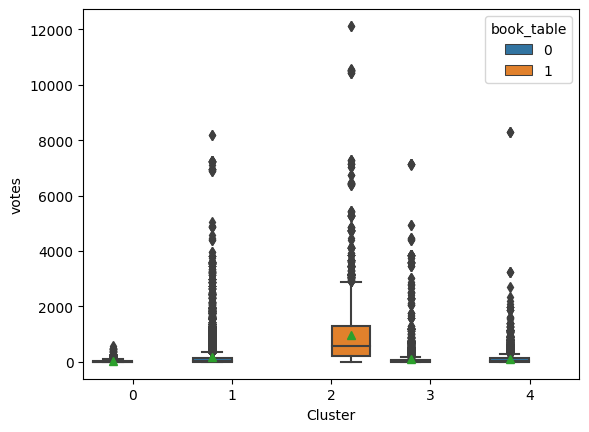

In [ ]:
sns.boxplot(x='Cluster', y='votes', data=food, showmeans=True,  hue='book_table', palette='tab10')

In [ ]:
X_scaled

,ave_cost_for_two,ave_review_ranking,votes,book_table
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,1
4,0,0,0,0
...,...,...,...,...
40125,0,0,0,0
40126,0,1,0,0
40127,0,1,0,0
40128,0,1,0,0


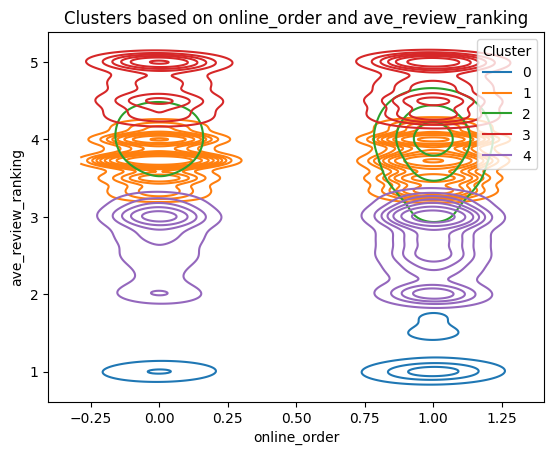

In [ ]:
# Create the KDE plot for the records
sns.kdeplot(data=food, x='online_order', y='ave_review_ranking', hue='Cluster', palette='tab10', legend='full')

# Setting the title and labels
plt.title('Clusters based on online_order and ave_review_ranking')
plt.xlabel('online_order')
plt.ylabel('ave_review_ranking')
#plt.legend(loc='upper right')

plt.show()

## Labelling clusters

In [ ]:
food.groupby('Cluster').votes.describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1615,42,72,0,0,10,49,559
1,19383,170,464,0,0,25,138,8185
2,4094,958,1200,0,210,560,1281,12121
3,6616,119,441,0,6,19,72,7137
4,8422,116,253,0,14,46,128,8304


In [ ]:
# Calculate mean for each cluster
cluster_summary = food.groupby('Cluster').mean()

# Print out the summary statistics
print(cluster_summary)

# Manually assign labels based on inspection
cluster_labels = {
    0: "Family-Friendly, Casual Dining",
    1: "Fast Food, Quick Service",
    2: "Fine Dining, High-End",
    3: "Healthy Options, Vegetarian",
    4: "Ethnic Cuisine, Spices"
}

# Add a new column to the DataFrame with label names
food['Cluster_Label'] = food['Cluster'].map(cluster_labels)

         location  rest_type  listed_in_type  listed_in_city  online_order  book_table  ave_cost_for_two  votes  ave_review_ranking  rate
Cluster                                                                                                                                  
0              31          4               3              14             1           0               410     42                   1     3
1              35          4               3              14             1           0               439    170                   4     4
2              40          2               3              14             1           1              1088    958                   4     4
3              35          4               3              14             1           0               437    119                   5     4
4              35          4               3              14             1           0               453    116                   3     3


<ipython-input-176-ad71323b612d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_summary = food.groupby('Cluster').mean()


In [ ]:
food.sample(20)

,name,location,rest_type,cuisines,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate,Cluster,Cluster_Label
1221,Sree Spicy Hub,33,2,"Andhra, Biryani, South Indian",4,25,1,0,600,234,4,4,1,"Fast Food, Quick Service"
26465,New Fishland,55,5,"Seafood, Chinese, North Indian, South Indian",2,22,0,0,400,39,5,4,3,"Healthy Options, Vegetarian"
942,Sri Maruthi Hotel,5,5,South Indian,4,26,0,0,300,66,4,4,3,"Healthy Options, Vegetarian"
8545,Feastaurant,22,2,"Bengali, Chinese",2,10,1,0,800,27,4,4,1,"Fast Food, Quick Service"
14432,Nutty Squirrel,82,6,"Ice Cream, Desserts",3,25,1,0,300,12,4,4,1,"Fast Food, Quick Service"
20235,Mr. Beans - Home Cafe,43,1,"Cafe, Continental, Italian",4,0,1,1,1000,2709,4,4,2,"Fine Dining, High-End"
38425,McDonald's,8,5,"Burger, Fast Food",2,27,1,0,500,184,4,4,1,"Fast Food, Quick Service"
9629,BanBay,86,1,"Cafe, Modern Indian, Pizza, Burger, Desserts",1,20,0,0,1100,44,4,4,3,"Healthy Options, Vegetarian"
38122,Kafe Nook,0,5,Fast Food,2,12,1,0,300,35,3,4,1,"Fast Food, Quick Service"
31040,Om Made Cafe,45,1,"Cafe, Continental, European, Juices",2,17,0,0,1300,2733,4,4,1,"Fast Food, Quick Service"


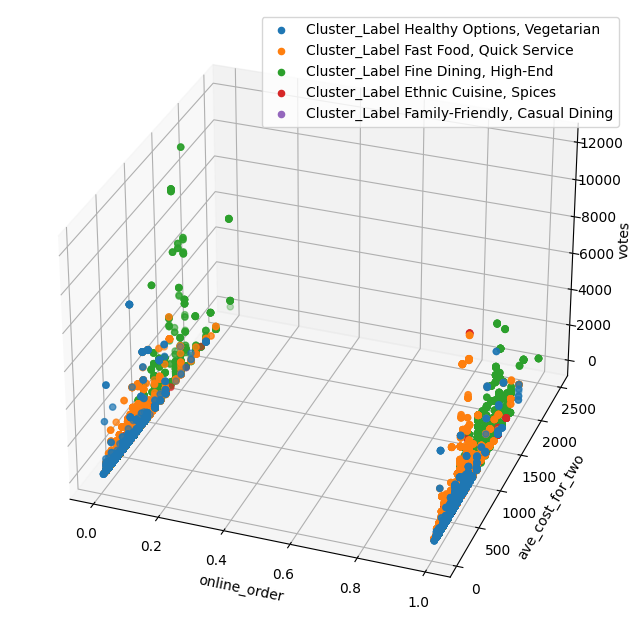

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = food['Cluster_Label'].unique()

# Use Seaborn's tab10 palette
colors = sns.color_palette('tab10', len(unique_clusters))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=30, azim=-70)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = food[food['Cluster_Label'] == cluster]
    ax.scatter(cluster_data['online_order'], cluster_data['ave_cost_for_two'], cluster_data['votes'],
               label=f'Cluster_Label {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('online_order')
ax.set_ylabel('ave_cost_for_two')
ax.set_zlabel('votes')
ax.legend()

# Show the plot
plt.show()

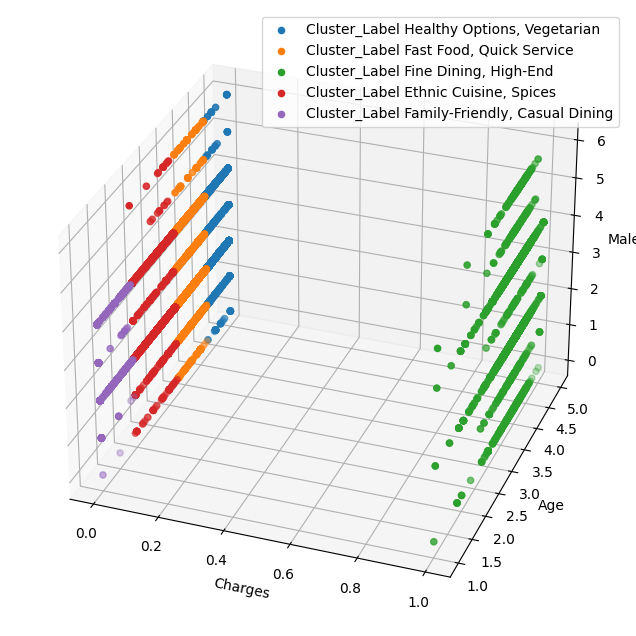

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(12, 8))

# Add 3D subplot
# The '111' means 1x1 grid, first subplot, similar to MATLAB-style
ax = fig.add_subplot(111, projection='3d')

# Unique cluster labels
unique_clusters = food['Cluster_Label'].unique()

# Use Seaborn's tab10 palette
colors = sns.color_palette('tab10', len(unique_clusters))

# Adjusting the viewing angle for better visibility
ax.view_init(elev=30, azim=-70)  # Modify these values as needed

# Scatter plot for each cluster
for i, cluster in enumerate(unique_clusters):
    cluster_data = food[food['Cluster_Label'] == cluster]
    ax.scatter(cluster_data['book_table'], cluster_data['ave_review_ranking'], cluster_data['listed_in_type'],
               label=f'Cluster_Label {cluster}', c=[colors[i]])

# Legend and labels
ax.set_xlabel('Charges')
ax.set_ylabel('Age')
ax.set_zlabel('Male')
ax.legend()

# Show the plot
plt.show()

In [ ]:
#You can get each cluster out and examine them separately
cluster_0 = food[food['Cluster'] == 0]

# Write code to get other clusters
cluster_1 = food[food['Cluster'] == 1]
cluster_2 = food[food['Cluster'] == 2]
cluster_3 = food[food['Cluster'] == 3]
cluster_4 = food[food['Cluster'] == 4]

In [ ]:
cluster_1.describe()

,location,rest_type,listed_in_type,listed_in_city,online_order,book_table,ave_cost_for_two,votes,ave_review_ranking,rate,Cluster
count,19383,19383,19383,19383,19383,19383,19383,19383,19383,19383,19383
mean,35,4,3,14,1,0,439,170,4,4,1
std,27,2,1,8,0,0,243,464,0,0,0
min,0,0,0,0,0,0,40,0,3,2,1
25%,9,2,2,7,0,0,300,0,4,4,1
50%,32,5,2,15,1,0,400,25,4,4,1
75%,56,5,4,20,1,0,600,138,4,4,1
max,92,6,6,29,1,0,2200,8185,4,5,1
